# Тема исследования: "Определение перспективного тарифа для телеком компании"

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

#### Цель: Выявить более прибыльный для компании тарифный план

#### Ход исследования:

Шаг 1. Открыть файл с данными и изучить общую информацию.

Шаг 2. Подготовка данных.

- Привести данные к нужным типам;
- Найти и исправить ошибки в данных;
- Пояснить, какие ошибки мы нашли и как их исправили. Обратить внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать нам — оценим, как их отсутствие повлияет на результаты анализа;


Посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

Шаг 3. Анализ данных.

- Описать поведение клиентов оператора, исходя из выборки. 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?  
- Посчитать среднее количество, дисперсию и стандартное отклонение. 
- Построить гистограммы. Описать распределения

Шаг 4. Проверка гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


Пороговое значение alpha зададим самостоятельно.
Поясним:

- как мы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

Шаг 5. Общий вывод

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы</a></span><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Изучение данных из файла

Импортируем полезные инструменты

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from math import factorial

In [4]:
from scipy import stats as st
import numpy as np

Отключим ненужные предупреждения Питона

In [5]:
import warnings
warnings.filterwarnings('ignore')

Сбросим ограничения на демонстрацию количества столбцов, зададим максималное количество символов в каждой строке, а также округлим выведение значений типа float до двух знаков после запятой.

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 80)
pd.options.display.float_format = '{:,.2f}'.format

Откроем файлы с таблицами

In [7]:
df_calls = pd.read_csv('/datasets/calls.csv')

In [8]:
df_internet = pd.read_csv('/datasets/internet.csv')

In [9]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [10]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [11]:
df_users = pd.read_csv('/datasets/users.csv')

Выведем для первого ознакомления по 10 строк каждой таблицы

In [12]:
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [13]:
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,"1,246.32",2018-11-26,1499


In [14]:
df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [15]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


А также посмотрим на информацию в таблицах:

О звонках:

In [17]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [18]:
df_calls.duplicated().sum()

0

In [19]:
df_calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


О интернете:

In [20]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [21]:
df_internet.duplicated().sum()

0

In [22]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


О сообщениях:

In [23]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [24]:
df_messages.duplicated().sum()

0

In [25]:
df_messages.describe()

,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


О тарифах:

In [26]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


О пользователях:

In [27]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [28]:
df_users.duplicated().sum()

0

In [29]:
df_users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


Составим рандомную таблицу (не с целью понимания истинного положения дел, а с целью необходимости взглянуть на все данные разом)

In [30]:
randomState = 500
a = df_calls.sample(10, random_state=randomState)

In [31]:
b = df_internet.sample(10, random_state=randomState)

In [32]:
c = df_messages.sample(10, random_state=randomState)

In [33]:
df_pivot = [[df_users.sample(10), a, b, c]]

In [34]:
df_pivot

[[     user_id  age churn_date         city first_name  last_name    reg_date  \
  424     1424   27        NaN       Москва    Розалия    Ёрохова  2018-06-20   
  425     1425   51        NaN        Пермь      Вадим      Фомин  2018-02-27   
  495     1495   65        NaN      Иркутск  Авксентий      Фокин  2018-08-28   
  470     1470   23        NaN  Новокузнецк     Эллада     Лосева  2018-10-19   
  169     1169   52        NaN         Сочи   Георгина  Карташова  2018-06-25   
  288     1288   63        NaN     Улан-Удэ   Григорий    Давыдов  2018-09-09   
  298     1298   29        NaN  Новосибирск    Надежда  Чеснокова  2018-07-26   
  16      1016   58        NaN         Омск     Марица   Сазонова  2018-11-21   
  115     1115   71        NaN       Москва      Рашид   Толкачев  2018-07-28   
  442     1442   48        NaN    Ульяновск    Клавдия   Ковалева  2018-11-13   
  
      tariff  
  424  ultra  
  425  smart  
  495  ultra  
  470  smart  
  169  smart  
  288  smart  
 

И, напоследок, для лучших понимания и наглядности, представим описание переменных в столбцах

Описание данных:

Таблица users (информация о пользователях):


- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Выводы

При самом первом, поверхностном ознакомлении с данными таблиц, можно сделать следующие выводы:

- Мы имеем пять таблиц, каждая из которых представляет собой взгляд на выдвигаемые бизнесом вопросы с точки зрения взаимосвязи нескольких параметров. В каждой таблице существует главный или ключевой параметр:
1. df_users - ключевой параметр - пользователи
2. df_calls - ключевой параметр - совершаемые звонки
3. df_messages - ключевой параметр - сообщения
4. df_internet - ключевой параметр - интернет-сессии
5. df_tariffs - ключевой параметр - тарифы
- Среди прочих, выделяется таблица с информацией по тарифам. Она имеет всего две строки (по одной для каждого тарифа), где сжато указаны основные условия отличия.
- Для ответов на интересующие нас вопросы, необходимо будет либо объединять таблицы в одну, либо делать сводные таблицы по интересующим нас параметрам. Ответ на этот и другие вопросы будем искать по мере поступления информации, поступающей в процессе обработки данных.
- Названия столбцов адекватны своему содержанию и замены не требуют
- Пропуски мы наблюдаем только в столбце с датой прекращения пользования тарифом ("churn_date") таблицы "df_users". Однако, как обозначено в предусловии, - если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Так что никаких секретов пропусков значений не возникает. 
- Не наблюдается дубликатов, по крайней мере явных. Для полной уверенности в их отсутствии, не мешало бы ещё проверить по типам и регистрам. Кроме того, закрадывается подозрение, что мы с ними ещё столкнёмся при объединении таблиц.


***Здесь и далее при употреблении слов "столбец" и "колонка" следует считать их синонимами

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы</a></span><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Подготовка данных

Вспомним названия наших датасетов:
- df_users - ключевой параметр - пользователи
- df_calls - ключевой параметр - совершаемые звонки
- df_messages - ключевой параметр - сообщения
- df_internet - ключевой параметр - интернет-сессии
- df_tariffs - ключевой параметр - тарифы

### Привести данные к нужным типам

In [35]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В силу дальнейшей необходимости вести подсчёты используя в качестве параметра только месяц (год везде один - 2018, а число для дальнейших подсчётов необязательно, если не сказать - лишнее), добавим колонку с именем 'month'. 

In [36]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['month'] = df_users['reg_date'].dt.month_name()

In [37]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,November
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,June
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,August
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,May


In [38]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
month         500 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 35.3+ KB


Распространим логику предыдущих действий и на остальные таблицы (за исключением таблицы с тарифами - за ненадобностью). Для этого напишем функцию. 

In [39]:
def add_column_month(df, column):
    df[column] = pd.to_datetime(df[column])
    df['month'] = df[column].dt.month_name()
    

In [40]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [41]:
add_column_month(df_calls, 'call_date')

In [42]:
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,July
1,1000_1,2018-08-17,0.00,1000,August
2,1000_2,2018-06-11,2.85,1000,June
3,1000_3,2018-09-21,13.80,1000,September
4,1000_4,2018-12-15,5.18,1000,December


In [43]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [44]:
add_column_month(df_messages, 'message_date')

In [45]:
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December


In [46]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [47]:
add_column_month(df_internet, 'session_date')

In [48]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,November
1,1,1000_1,"1,052.81",2018-09-07,1000,September
2,2,1000_2,"1,197.26",2018-06-25,1000,June
3,3,1000_3,550.27,2018-08-22,1000,August
4,4,1000_4,302.56,2018-09-24,1000,September


Теперь избавимся от ненужных столбцов с полной датой

In [49]:
def delete_column(df, column):
    df.pop(column)


In [50]:
delete_column(df_users, 'reg_date')

In [51]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,ultra,May
1,1001,41,NaN,Москва,Иван,Ежов,smart,November
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,smart,June
3,1003,23,NaN,Москва,Белла,Белякова,ultra,August
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,ultra,May


In [52]:
delete_column(df_calls, 'call_date')

In [53]:
df_calls.head()

,id,duration,user_id,month
0,1000_0,0.00,1000,July
1,1000_1,0.00,1000,August
2,1000_2,2.85,1000,June
3,1000_3,13.80,1000,September
4,1000_4,5.18,1000,December


In [54]:
delete_column(df_messages, 'message_date')

In [55]:
df_messages.head()

,id,user_id,month
0,1000_0,1000,June
1,1000_1,1000,October
2,1000_2,1000,August
3,1000_3,1000,June
4,1000_4,1000,December


In [56]:
delete_column(df_internet, 'session_date')

In [57]:
df_internet.head()

,Unnamed: 0,id,mb_used,user_id,month
0,0,1000_0,112.95,1000,November
1,1,1000_1,"1,052.81",1000,September
2,2,1000_2,"1,197.26",1000,June
3,3,1000_3,550.27,1000,August
4,4,1000_4,302.56,1000,September


Нам дана информация о том, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Исходя из этого, приходим к выводу - гораздо проще и правильнее в последующем работать с числами типа "int", округлёнными в большую сторону. По примеру "Мегалайн" округлим значения для потребляемых клиентами минут и мегабайт. 

In [58]:
def round_up_value (df, column):
    df[column] = np.ceil(df[column]).astype(int)

In [59]:
round_up_value (df_calls, 'duration')

In [60]:
df_calls.head()

,id,duration,user_id,month
0,1000_0,0,1000,July
1,1000_1,0,1000,August
2,1000_2,3,1000,June
3,1000_3,14,1000,September
4,1000_4,6,1000,December


In [61]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id          202607 non-null object
duration    202607 non-null int64
user_id     202607 non-null int64
month       202607 non-null object
dtypes: int64(2), object(2)
memory usage: 6.2+ MB


In [62]:
round_up_value (df_internet, 'mb_used')

In [63]:
df_internet.head()

,Unnamed: 0,id,mb_used,user_id,month
0,0,1000_0,113,1000,November
1,1,1000_1,1053,1000,September
2,2,1000_2,1198,1000,June
3,3,1000_3,551,1000,August
4,4,1000_4,303,1000,September


In [64]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0    149396 non-null int64
id            149396 non-null object
mb_used       149396 non-null int64
user_id       149396 non-null int64
month         149396 non-null object
dtypes: int64(3), object(2)
memory usage: 5.7+ MB


Итого: заменили столбцы с датой на столбцы с месяцами, округлили значения затраченных минут и мегабайт в большую сторону и преобразовали из типа "float" в тип "int".

### Найти и исправить ошибки в данных

Вспомним названия наших датасетов:
- df_users - ключевой параметр - пользователи
- df_calls - ключевой параметр - совершаемые звонки
- df_messages - ключевой параметр - сообщения
- df_internet - ключевой параметр - интернет-сессии
- df_tariffs - ключевой параметр - тарифы

Проверим, какие есть ошибки. Начнём с пропущенных значений:

In [65]:
df_users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
tariff          0
month           0
dtype: int64

In [66]:
df_calls.isnull().sum()

id          0
duration    0
user_id     0
month       0
dtype: int64

In [67]:
df_messages.isnull().sum()

id         0
user_id    0
month      0
dtype: int64

In [68]:
df_internet.isnull().sum()

Unnamed: 0    0
id            0
mb_used       0
user_id       0
month         0
dtype: int64

Ещё раз взглянем на дубликаты:

In [69]:
df_users.duplicated().sum()

0

In [70]:
df_users.duplicated().sum()

0

In [71]:
df_messages.duplicated().sum()

0

In [72]:
df_internet.duplicated().sum()

0

Теперь убедимся в том, что нет повторов связанных с:
- разным регистром названий
- заменой буквы "е" буквой "ё"
- записью значений, указанных в разных типах

In [73]:
def search_skip(df, column1, column2, column3):
    columns = [column1, column2, column3]
    for i in columns:
        if len(df[i].unique()) == len(df[i].str.lower().unique()):
            display(f'В столбце {i} повторов, связанных с регистром не обнаружено')
        else:
            display('В столбце', i, 'обнаружено', len(df[i].str.lower().unique()) - len(df[i].unique()), 'пропусков')
    

In [74]:
search_skip(df_users, 'city', 'first_name', 'last_name')

'В столбце city повторов, связанных с регистром не обнаружено'

'В столбце first_name повторов, связанных с регистром не обнаружено'

'В столбце last_name повторов, связанных с регистром не обнаружено'

In [75]:
def search_letter(df, column1, column2, column3):
    columns = [column1, column2, column3]
    for i in columns:
        a = len(df[i].unique())
        df[i] = df[i].str.replace('ё', 'е', regex=True)
        df[i] = df[i].astype('object')
        b = len(df[i].unique())
        if a == b:
            print(f'Повторов в столбце {i}, связанных с заменой "ё" на "е" не обнаружено')
        else:
            print('В столбце', i, a - b, 'повтора, связанных с заменой "ё" на "е"')

In [76]:
search_letter(df_users, 'city', 'first_name', 'last_name')

Повторов в столбце city, связанных с заменой "ё" на "е" не обнаружено
Повторов в столбце first_name, связанных с заменой "ё" на "е" не обнаружено
В столбце last_name 3 повтора, связанных с заменой "ё" на "е"


Теперь посмотрим на уникальные значения затраченных пользователями минут и мегабайт

In [77]:
df_calls['duration'].value_counts().sort_values()

38        2
37        2
36        2
34        3
35        5
33       10
32       17
31       30
30       39
29       56
28      104
27      151
26      257
25      363
24      468
23      720
22      975
21     1304
20     1806
19     2411
18     2984
17     3671
16     4551
15     5505
14     6554
13     7486
1      8402
12     8448
2      9194
11     9385
10    10186
3     10362
4     10918
9     10973
8     11272
5     11411
6     11457
7     11510
0     39613
Name: duration, dtype: int64

In [78]:
df_calls['duration'].value_counts().sort_values() / df_calls.shape[0] * 100

38    0.00
37    0.00
36    0.00
34    0.00
35    0.00
33    0.00
32    0.01
31    0.01
30    0.02
29    0.03
28    0.05
27    0.07
26    0.13
25    0.18
24    0.23
23    0.36
22    0.48
21    0.64
20    0.89
19    1.19
18    1.47
17    1.81
16    2.25
15    2.72
14    3.23
13    3.69
1     4.15
12    4.17
2     4.54
11    4.63
10    5.03
3     5.11
4     5.39
9     5.42
8     5.56
5     5.63
6     5.65
7     5.68
0    19.55
Name: duration, dtype: float64

In [79]:
df_internet['mb_used'].value_counts().sort_values()

1279        1
1463        1
1336        1
1308        1
1435        1
        ...  
334       222
377       224
382       228
333       231
0       19598
Name: mb_used, Length: 1424, dtype: int64

In [80]:
df_internet['mb_used'].value_counts().sort_values() / df_internet.shape[0] * 100

1279    0.00
1463    0.00
1336    0.00
1308    0.00
1435    0.00
        ... 
334     0.15
377     0.15
382     0.15
333     0.15
0      13.12
Name: mb_used, Length: 1424, dtype: float64

### Пояснить, какие ошибки мы нашли и как их исправили. Обратить внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать нам — оценим, как их отсутствие повлияет на результаты анализа

Результатом поиска ошибок стало следующее:
- Дубликатов в явном виде не обнаружено
- Дубликатов, связанных с разными регистрами не обнаружено
- Обнаружено и удалено три дубликата, связанных с заменой буквы "ё" на "е"
- Пропущенные значения обнаружены только в колонке с датой прекращения пользования тарифом ("churn_date") таблицы "df_users". Однако, как обозначено в предусловии, - если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Поэтому дополнительных объяснений пропусков значений не требуется. Принято решение оставить эти пропуски в неизменном виде, по крайней мере пока.
- Обнаружено 39613 нулевых значения в колонке 'duration' таблицы df_calls, что составляет 19.5% от общего количества звонков. Почти пятая часть всех значений. Удаление, либо игнорирование такой большой доли значений значительно исказит статистику. Поскольку пользователь мог попросту не пользоваться звонками в тот или иной момент времени либо не смог дозвониться до другого абонента, будем считать нулевые значения не каким-то артефактом, а вполне валидным значением. Продолжительность звонка = 0 минут. Решение - оставляем значения без изменений.
- Обнаружено 19598 нулевых значения в колонке 'mb_used' таблицы df_internet, что составляет 13.1% от количества мегабайт по другим значениям использования. Распространим логику предыдущего пункта рассмотрения (звонки) на количество израсходованных мегабайт. Решение - считать нулевые значения валидными, оставляем их без изменений.

### Посчитать для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам

Посчитаем количество звонков для каждого пользователя за месяц

In [81]:
calls_df = df_calls[['user_id', 'month', 'duration']]

In [82]:
call_count = calls_df.groupby(['user_id', 'month']).count()

In [83]:
call_count

duration
user_id month              
1000    August           52
        December         46
        July             47
        June             43
        May              22
...                     ...
1498    September        59
1499    December         69
        November         74
        October          68
        September         9

[3174 rows x 1 columns]

Посчитаем количество затраченных пользователем минут за месяц

In [84]:
call_sum = df_calls.groupby(['user_id', 'month']).sum()

In [85]:
call_sum

duration
user_id month              
1000    August          408
        December        333
        July            340
        June            172
        May             159
...                     ...
1498    September       471
1499    December        492
        November        612
        October         449
        September        70

[3174 rows x 1 columns]

### Посчитать для каждого пользователя: количество отправленных сообщений по месяцам

Таким же образом подсчитаем количество отправленных пользователем за месяц сообщений

In [86]:
messages_count = df_messages.groupby(['user_id', 'month']).count()

In [87]:
messages_count

id
user_id month        
1000    August     81
        December   70
        July       75
        June       60
        May        22
...                ..
1498    September  44
1499    December   66
        November   59
        October    48
        September  11

[2717 rows x 1 columns]

Обратим внимание на различие в количестве строк таблиц messages_count (2717 строк) и предыдущих двух: call_count (3174 строки) и call_sum (3174 строки). Пока просто зафиксируем факт различия этих значний равный 457.

### Посчитать для каждого пользователя: объем израсходованного интернет-трафика по месяцам

Распространим логику последних шагов на подсчёт объема, израсходованного интернет-трафика по месяцам для пользователей

In [88]:
internet_df = df_internet[['user_id', 'month', 'mb_used']]

In [89]:
internet_sum = internet_df.groupby(['user_id', 'month']).sum()

In [90]:
internet_sum.head()

mb_used
user_id month            
1000    August      14070
        December     9827
        July        14016
        June        23257
        May          2256

### Посчитать для каждого пользователя: помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану)

Составим сводную таблицу по имеющимся подсчётам значений по месяцам

Чтоб не множить действия, присвоим сводной таблице значения таблицы call_sum

In [91]:
df = call_sum

In [92]:
df.head()

duration
user_id month             
1000    August         408
        December       333
        July           340
        June           172
        May            159

Присоединим к ней таблицу с количеством израсходованных сообщений, объединяя по полям 'user_id' и 'month'

In [93]:
df = df.merge(messages_count, on=['user_id', 'month'], how='outer')

In [94]:
df.head()

duration    id
user_id month                   
1000    August      408.00 81.00
        December    333.00 70.00
        July        340.00 75.00
        June        172.00 60.00
        May         159.00 22.00

Добавим к нашей итоговой таблице df таблицу с суммарными затратами интернет-трафика, используя в качестве полей объединения те же 'user_id' и 'month'

In [95]:
df = df.merge(internet_sum, on=['user_id', 'month'], how='outer')

In [96]:
df.head()

duration    id   mb_used
user_id month                             
1000    August      408.00 81.00 14,070.00
        December    333.00 70.00  9,827.00
        July        340.00 75.00 14,016.00
        June        172.00 60.00 23,257.00
        May         159.00 22.00  2,256.00

Добавим к итоговой таблице пользователей по полю 'user_id' и, чтобы не потерять значения месяцев, добавим метод reset_index()

In [97]:
df = df.reset_index().merge(df_users, on=['user_id'], how='outer')

In [98]:
df.head()

,user_id,month_x,duration,id,mb_used,age,churn_date,city,first_name,last_name,tariff,month_y
0,1000,August,408.00,81.00,"14,070.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May
1,1000,December,333.00,70.00,"9,827.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May
2,1000,July,340.00,75.00,"14,016.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May
3,1000,June,172.00,60.00,"23,257.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May
4,1000,May,159.00,22.00,"2,256.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May


Поправим названия колонок, чтоб они адекватно отображали своё содержимое

In [99]:
df.columns.tolist()

['user_id',
 'month_x',
 'duration',
 'id',
 'mb_used',
 'age',
 'churn_date',
 'city',
 'first_name',
 'last_name',
 'tariff',
 'month_y']

In [100]:
cols = ['user_id',
 'month',
 'minute_sum',
 'messages_count',
 'mb_sum',
 'age',
 'churn_date',
 'city',
 'first_name',
 'last_name',
 'tariff',
 'month_y'] 
df.set_axis(cols, axis='columns', inplace=True)

In [101]:
df.head()

,user_id,month,minute_sum,messages_count,mb_sum,age,churn_date,city,first_name,last_name,tariff,month_y
0,1000,August,408.00,81.00,"14,070.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May
1,1000,December,333.00,70.00,"9,827.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May
2,1000,July,340.00,75.00,"14,016.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May
3,1000,June,172.00,60.00,"23,257.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May
4,1000,May,159.00,22.00,"2,256.00",52,NaN,Краснодар,Рафаил,Верещагин,ultra,May


Поправим порядок расположения столбцов для удобства восприятия

In [102]:
df = df[['user_id',
        'first_name',
        'last_name',
        'age',
        'city',
        'tariff',
        'month',
        'minute_sum',
        'messages_count',
        'mb_sum',
        'churn_date']]

In [103]:
df.head()

,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date
0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408.00,81.00,"14,070.00",NaN
1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333.00,70.00,"9,827.00",NaN
2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340.00,75.00,"14,016.00",NaN
3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172.00,60.00,"23,257.00",NaN
4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159.00,22.00,"2,256.00",NaN


Исправим названия столбца в таблице df_tariffs

In [104]:
df_tariffs.columns.tolist()

['messages_included',
 'mb_per_month_included',
 'minutes_included',
 'rub_monthly_fee',
 'rub_per_gb',
 'rub_per_message',
 'rub_per_minute',
 'tariff_name']

In [105]:
cols = ['messages_included',
 'mb_per_month_included',
 'minutes_included',
 'rub_monthly_fee',
 'rub_per_gb',
 'rub_per_message',
 'rub_per_minute',
 'tariff']
df_tariffs.set_axis(cols, axis='columns', inplace=True)

In [106]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Присоединим таблицу с тарифами к итоговой таблице по колонке 'tariff'

In [107]:
df = df.reset_index().merge(df_tariffs, on=['tariff'], how='outer')

In [108]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408.00,81.00,"14,070.00",NaN,1000,30720,3000,1950,150,1,1
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333.00,70.00,"9,827.00",NaN,1000,30720,3000,1950,150,1,1
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340.00,75.00,"14,016.00",NaN,1000,30720,3000,1950,150,1,1
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172.00,60.00,"23,257.00",NaN,1000,30720,3000,1950,150,1,1
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159.00,22.00,"2,256.00",NaN,1000,30720,3000,1950,150,1,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
index                    3216 non-null int64
user_id                  3216 non-null int64
first_name               3216 non-null object
last_name                3216 non-null object
age                      3216 non-null int64
city                     3216 non-null object
tariff                   3216 non-null object
month                    3214 non-null object
minute_sum               3174 non-null float64
messages_count           2717 non-null float64
mb_sum                   3203 non-null float64
churn_date               189 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: float64(3), int64(1

Заменим пропущенные значения нулями для удобства выполнения дальнейших операций

In [110]:
df['minute_sum'] = df['minute_sum'].fillna(0)

In [111]:
df['messages_count'] = df['messages_count'].fillna(0)

In [112]:
df['mb_sum'] = df['mb_sum'].fillna(0)

In [113]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408.00,81.00,"14,070.00",NaN,1000,30720,3000,1950,150,1,1
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333.00,70.00,"9,827.00",NaN,1000,30720,3000,1950,150,1,1
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340.00,75.00,"14,016.00",NaN,1000,30720,3000,1950,150,1,1
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172.00,60.00,"23,257.00",NaN,1000,30720,3000,1950,150,1,1
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159.00,22.00,"2,256.00",NaN,1000,30720,3000,1950,150,1,1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
index                    3216 non-null int64
user_id                  3216 non-null int64
first_name               3216 non-null object
last_name                3216 non-null object
age                      3216 non-null int64
city                     3216 non-null object
tariff                   3216 non-null object
month                    3214 non-null object
minute_sum               3216 non-null float64
messages_count           3216 non-null float64
mb_sum                   3216 non-null float64
churn_date               189 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: float64(3), int64(1

По какой-то причине после применения метода merge интовые значения поменялись на флоат. Исправим это.

In [115]:
df['minute_sum'] = df['minute_sum'].astype('int')

In [116]:
df['messages_count'] = df['messages_count'].astype('int')

In [117]:
df['mb_sum'] = df['mb_sum'].astype('int')

In [118]:
df.head(20)

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1
5,5,1000,Рафаил,Верещагин,52,Краснодар,ultra,November,338,58,14768,NaN,1000,30720,3000,1950,150,1,1
6,6,1000,Рафаил,Верещагин,52,Краснодар,ultra,October,350,73,14717,NaN,1000,30720,3000,1950,150,1,1
7,7,1000,Рафаил,Верещагин,52,Краснодар,ultra,September,466,57,14581,NaN,1000,30720,3000,1950,150,1,1
8,17,1003,Белла,Белякова,23,Москва,ultra,August,380,37,8571,NaN,1000,30720,3000,1950,150,1,1
9,18,1003,Белла,Белякова,23,Москва,ultra,December,802,75,10132,NaN,1000,30720,3000,1950,150,1,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
index                    3216 non-null int64
user_id                  3216 non-null int64
first_name               3216 non-null object
last_name                3216 non-null object
age                      3216 non-null int64
city                     3216 non-null object
tariff                   3216 non-null object
month                    3214 non-null object
minute_sum               3216 non-null int64
messages_count           3216 non-null int64
mb_sum                   3216 non-null int64
churn_date               189 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: int64(13), object(6)
memo

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [120]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1


Посчитать для каждого пользователя: помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану)

Для решения этой задачи, проверим - израсходовал ли абонент свои минуты. Если нет - то мы просто отображаем в колонке с подсчётом затрат за месяц стоимость его тарифа. В противном случае действуем согласно инструкции.

In [121]:
def revenue_calculation(row):
    if (row['minute_sum'] - row['minutes_included']) > 0:
        col_minute = (row['minute_sum'] - row['minutes_included']) * row['rub_per_minute'] + row['rub_monthly_fee']
        return col_minute
    else:
        return row['rub_monthly_fee']
    
    
df['revenue_calculation_minute'] = df.apply(revenue_calculation, axis=1)    

In [122]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950


In [123]:
df.tail()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute
3211,3210,1489,Павел,Гончаров,35,Санкт-Петербург,smart,December,0,35,17341,NaN,50,15360,500,550,200,3,3,550
3212,3211,1489,Павел,Гончаров,35,Санкт-Петербург,smart,November,0,20,17516,NaN,50,15360,500,550,200,3,3,550
3213,3212,1489,Павел,Гончаров,35,Санкт-Петербург,smart,October,0,21,19588,NaN,50,15360,500,550,200,3,3,550
3214,3213,1489,Павел,Гончаров,35,Санкт-Петербург,smart,September,0,32,17232,NaN,50,15360,500,550,200,3,3,550
3215,3215,1371,Ириней,Трофимов,50,Омск,smart,NaN,0,0,0,2018-12-30,50,15360,500,550,200,3,3,550


Подозрительно много значений стоимости тарифных пакетов. Неужели наши абоненты так мало разговаривают? Посмотрим дополнительную информацию.

In [124]:
df['revenue_calculation_minute'].value_counts().sort_values()

2065       1
1105       1
1081       1
1075       1
1033       1
        ... 
667        7
682        7
646        9
1950     986
550     1476
Name: revenue_calculation_minute, Length: 292, dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
index                         3216 non-null int64
user_id                       3216 non-null int64
first_name                    3216 non-null object
last_name                     3216 non-null object
age                           3216 non-null int64
city                          3216 non-null object
tariff                        3216 non-null object
month                         3214 non-null object
minute_sum                    3216 non-null int64
messages_count                3216 non-null int64
mb_sum                        3216 non-null int64
churn_date                    189 non-null object
messages_included             3216 non-null int64
mb_per_month_included         3216 non-null int64
minutes_included              3216 non-null int64
rub_monthly_fee               3216 non-null int64
rub_per_gb                    3216 non-null int64
rub_per_message               3216 non

In [126]:
3216 - (986 + 1476)

754

In [127]:
754 / 3216 * 100

23.445273631840795

Всего лишь 23.4 процента превысили лимит своего тарифа. На первый взгляд, создаётся впечатление, что это совсем немного.

Создадим ещё две колонки: для доходов за месяц по сообщениям и доходов за месяц для интернет-трафика

Добавим сначала столбец для сообщений. Если превышения лимита не произошло - итоговым значением будем указывать ноль, чтоб получить корректные значения при суммировании всех столбцов доходов. В противном случае - будем умножать на стоимость согласно тарифной сетке.

In [128]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950


In [129]:
def revenue_calculation1(row, col1, col2, col3):
    if (row[col1] - row[col2]) > 0:
        col_messages = (row[col1] - row[col2]) * row[col3]
        return col_messages
    else:
        return 0
    
    
df['revenue_calculation_messages'] = df.apply(revenue_calculation1, axis=1, args=('messages_count', 
                                                                               'messages_included', 
                                                                               'rub_per_message',
                                                                              ))    

In [130]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0


In [131]:
df['revenue_calculation_messages'].value_counts().sort_values()

279       1
237       1
231       1
201       1
225       1
       ... 
30       19
48       20
18       20
3        24
0      2652
Name: revenue_calculation_messages, Length: 74, dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
index                           3216 non-null int64
user_id                         3216 non-null int64
first_name                      3216 non-null object
last_name                       3216 non-null object
age                             3216 non-null int64
city                            3216 non-null object
tariff                          3216 non-null object
month                           3214 non-null object
minute_sum                      3216 non-null int64
messages_count                  3216 non-null int64
mb_sum                          3216 non-null int64
churn_date                      189 non-null object
messages_included               3216 non-null int64
mb_per_month_included           3216 non-null int64
minutes_included                3216 non-null int64
rub_monthly_fee                 3216 non-null int64
rub_per_gb                      3216 non-null int64
rub_

In [133]:
(3216 - 2652) / 3216 * 100

17.537313432835823

Итого: всего 17.5 процентов пользователей вышли за рамки лимита по количествам сообщений

Теперь добавим в таблицу колонку доходов за месяц для интернет-трафика. При её заполнении применим логику, использованную при заполнении колонки с доходами от сообщений

In [134]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0


In [135]:
def revenue_calculation2(row):
    if (row['mb_sum'] - row['mb_per_month_included']) > 0:
        col_mb = (row['mb_sum'] - row['mb_per_month_included']) / 1000 * row['rub_per_gb']
        return col_mb
    else:
        return 0
    
    
df['revenue_calculation_mb'] = df.apply(revenue_calculation2, axis=1)    

In [136]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0.00
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0.00
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0.00
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0.00
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0.00


Изменим тип данных получившейся колонки на целочисленный

In [137]:
df['revenue_calculation_mb'] = df['revenue_calculation_mb'].astype('int')

In [138]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0


In [139]:
df['revenue_calculation_mb'].value_counts().sort_values()

42         1
467        1
2510       1
459        1
957        1
        ... 
562        5
110        5
399        5
299        6
0       1774
Name: revenue_calculation_mb, Length: 1058, dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
index                           3216 non-null int64
user_id                         3216 non-null int64
first_name                      3216 non-null object
last_name                       3216 non-null object
age                             3216 non-null int64
city                            3216 non-null object
tariff                          3216 non-null object
month                           3214 non-null object
minute_sum                      3216 non-null int64
messages_count                  3216 non-null int64
mb_sum                          3216 non-null int64
churn_date                      189 non-null object
messages_included               3216 non-null int64
mb_per_month_included           3216 non-null int64
minutes_included                3216 non-null int64
rub_monthly_fee                 3216 non-null int64
rub_per_gb                      3216 non-null int64
rub_

In [141]:
(3216 - 1774) / 3216 * 100

44.83830845771145

Интересно, получается, что количество абонентов превысивших лимит на ежемесячное количество мегабайт больше, чем количество абонентов превысивших лимит на звонки и сообщения вместе взятых. В процентном соотношении - 44.8%

Создадим функцию для создания итогового столбца по доходам за месяц (сумма звонков, сообщений и интернет-трафика)

In [142]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0


In [143]:
df['revenue_calculation_sum'] = df['revenue_calculation_minute'] + df['revenue_calculation_messages'] + df['revenue_calculation_mb']

In [144]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950


In [145]:
df['revenue_calculation_sum'].sort_values().value_counts()

1950    853
550     565
604       8
589       7
577       7
       ... 
2496      1
2492      1
2466      1
2464      1
2049      1
Name: revenue_calculation_sum, Length: 1184, dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 23 columns):
index                           3216 non-null int64
user_id                         3216 non-null int64
first_name                      3216 non-null object
last_name                       3216 non-null object
age                             3216 non-null int64
city                            3216 non-null object
tariff                          3216 non-null object
month                           3214 non-null object
minute_sum                      3216 non-null int64
messages_count                  3216 non-null int64
mb_sum                          3216 non-null int64
churn_date                      189 non-null object
messages_included               3216 non-null int64
mb_per_month_included           3216 non-null int64
minutes_included                3216 non-null int64
rub_monthly_fee                 3216 non-null int64
rub_per_gb                      3216 non-null int64
rub_

In [147]:
(3216 - (853 + 565)) / 3216 * 100

55.90796019900498

Как видим, доля абонентов превысивших лимиты (для обоих тарифных планов) составляет 55.9%. Нам предстоит узнать какая доля приходится на каждый тариф и какой тариф по итогу окажется более выгодным. Интрига!

### Выводы

В процессе подготовки данных мы:


- Заменили столбцы с датой на столбцы с месяцами, округлили значения затраченных минут и мегабайт в большую сторону и преобразовали из типа "float" в тип "int".

Произвели поиск ошибок и выяснили:

- Дубликатов в явном виде не обнаружено
- Дубликатов, связанных с разными регистрами не обнаружено
- Обнаружено и удалено три дубликата, связанных с заменой буквы "ё" на "е"
- Пропущенные значения обнаружены только в колонке с датой прекращения пользования тарифом ("churn_date") таблицы "df_users". - Однако, как обозначено в предусловии, - если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Поэтому дополнительных объяснений пропусков значений не требуется. Принято решение оставить эти пропуски в неизменном виде, по крайней мере пока.
- Обнаружено 39613 нулевых значения в колонке 'duration' таблицы df_calls, что составляет 19.5% от общего количества звонков. Почти пятая часть всех значений. Удаление, либо игнорирование такой большой доли значений значительно исказит статистику. Поскольку пользователь мог попросту не пользоваться звонками в тот или иной момент времени либо не смог дозвониться до другого абонента, будем считать нулевые значения не каким-то артефактом, а вполне валидным значением. Продолжительность звонка = 0 минут. Решение - оставляем значения без изменений.
- Обнаружено 19598 нулевых значения в колонке 'mb_used' таблицы df_internet, что составляет 13.1% от количества мегабайт по другим значениям использования. Распространим логику предыдущего пункта рассмотрения (звонки) на количество израсходованных мегабайт. Решение - считать нулевые значения валидными, оставляем их без изменений.

- Мы учли информацию о том, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Исходя из этого, пришли к выводу - гораздо проще и правильнее в последующем работать с числами типа "int", округлёнными в большую сторону. По примеру "Мегалайн" округлили значения для потребляемых клиентами минут и мегабайт.

- Посчитали сумму затраченных минут для совершения звонков, сумму использованных мегабайт и количество сообщений для каждого пользователя за месяц

- Объединили таблицы с суммами минут, мегабайт, количеством сообщений, информацией о пользователях и тарифах в единую таблицу.

- Посчитали: помесячную выручку с каждого пользовател по суммарному количеству звонков, сообщений и интернет-трафику (для каждой из этих категорий создали отдельную колонку), а также подсчитали общую выручку по всем категориям.

- Хотелось бы обратить внимание на то, что, доля абонентов превысивших лимиты (для обоих тарифных планов) составляет 55.9%. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы</a></span><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

##  Анализ данных

Для анализа данных нам не потребуются все значения всех столбцов. Для решения каждой задачи мы будем составлять отдельную сводную таблицу

### Описать поведение клиентов оператора, исходя из выборки

Ставя перед собой столь абстрактную задачу, как описание поведения клиентов, - реализацию задачи подчиним той же абстракции, без конкретики. Для начала посмотрим на отличие в поведении выделенное по критерию места проживания пользователя.

In [148]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950


In [149]:
city_table = df[['user_id', 'city', 'month', 'tariff', 'revenue_calculation_sum']]

In [150]:
city_table

,user_id,city,month,tariff,revenue_calculation_sum
0,1000,Краснодар,August,ultra,1950
1,1000,Краснодар,December,ultra,1950
2,1000,Краснодар,July,ultra,1950
3,1000,Краснодар,June,ultra,1950
4,1000,Краснодар,May,ultra,1950
...,...,...,...,...,...
3211,1489,Санкт-Петербург,December,smart,946
3212,1489,Санкт-Петербург,November,smart,981
3213,1489,Санкт-Петербург,October,smart,1395
3214,1489,Санкт-Петербург,September,smart,924


In [151]:
city_pivot = city_table.pivot_table(index='city', columns='tariff', values='revenue_calculation_sum', aggfunc='sum')

In [152]:
city_pivot

tariff,smart,ultra
city,,
Архангельск,"14,862.00",nan
Астрахань,"31,309.00","9,750.00"
Балашиха,"25,703.00","19,500.00"
Барнаул,"5,088.00","21,450.00"
Белгород,"10,819.00",nan
...,...,...
Челябинск,"44,978.00","42,900.00"
Череповец,"23,427.00","5,850.00"
Чита,"21,286.00",nan


In [153]:
city_pivot.describe()

tariff,smart,ultra
count,72.00,57.00
mean,"38,584.57","35,686.32"
std,"63,595.87","62,922.74"
min,771.00,"1,950.00"
25%,"13,149.00","11,700.00"
50%,"22,033.50","21,450.00"
75%,"44,389.50","40,274.00"
max,"461,198.00","464,911.00"


Посмотрим, как соотносятся друг с другом статистические данные тарифов, наблюдаемые сквозь призму городов 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cb7fe1390>,
      dtype=object)

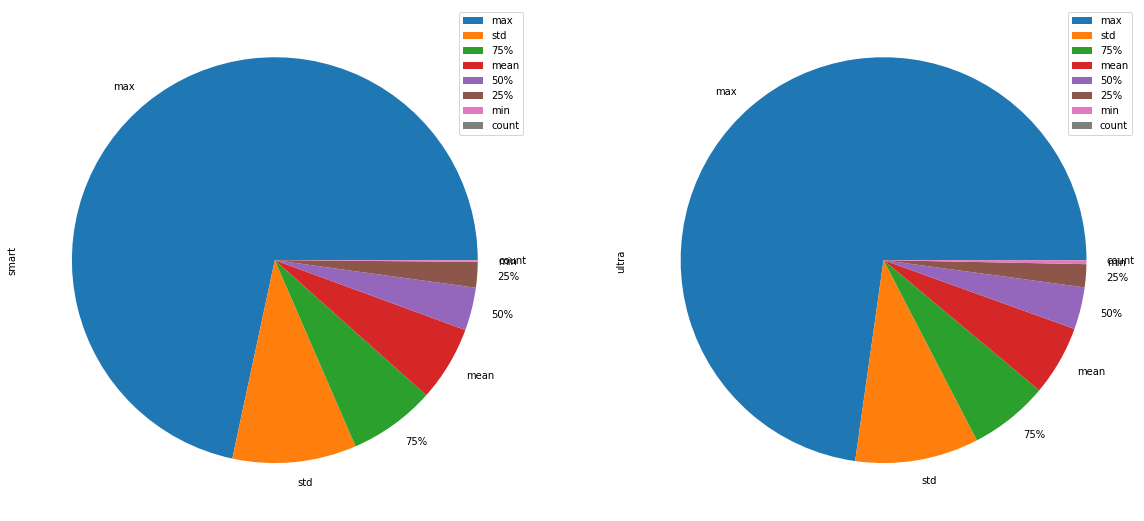

In [154]:
city_pivot.describe().sort_values('ultra', ascending=False).plot(subplots=True, figsize=(20,20),kind='pie')

Как видим, на круговой диаграмме данные по двум тарифам достаточно схоже соотносятся друг с другом

Посмотрим, как эти два тарифа соотносятся друг с другом по суммарным значениям

In [155]:
smart_sum = city_pivot['smart'].sum() / 1000000

In [156]:
smart_sum

2.778089

In [157]:
ultra_sum = city_pivot['ultra'].sum() / 1000000

In [158]:
ultra_sum

2.03412

Интересные значения, как видим, выручка от более дешёвого тарифного пакета Смарт приносит больше выручки, чем дорогой тариф Ультра.

Теперь посмотрим, как тарифы отражаются на их пользователях в разных городах

Text(0, 0.5, 'Города')

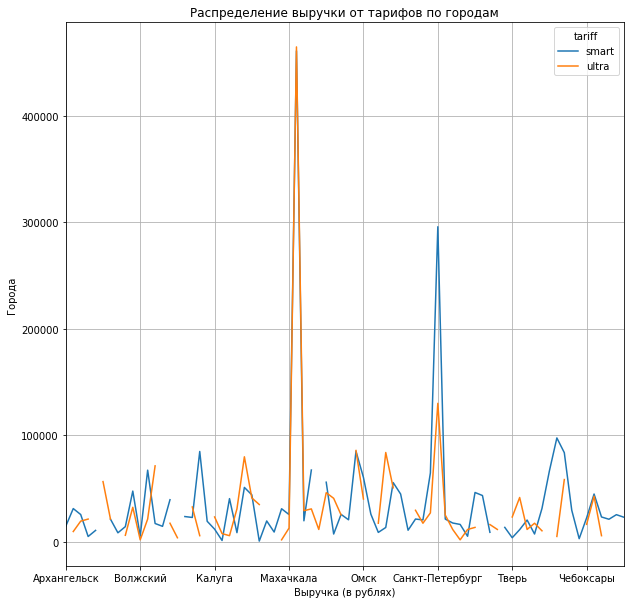

In [159]:
ax = city_pivot.plot(grid=True, figsize=(10,10), title='Распределение выручки от тарифов по городам')

ax.set_xlabel('Выручка (в рублях)')
ax.set_ylabel('Города')

Не совсем понятно, выбросы ли это, является ли Махачкала более ярким потребителем более дорогого тарифа чем (вопреки ожиданиям) Москва и где вообще на графике у нас Москва? Представим для наглядности данные с помощью круговых диаграмм

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3caf8068d0>,
      dtype=object)

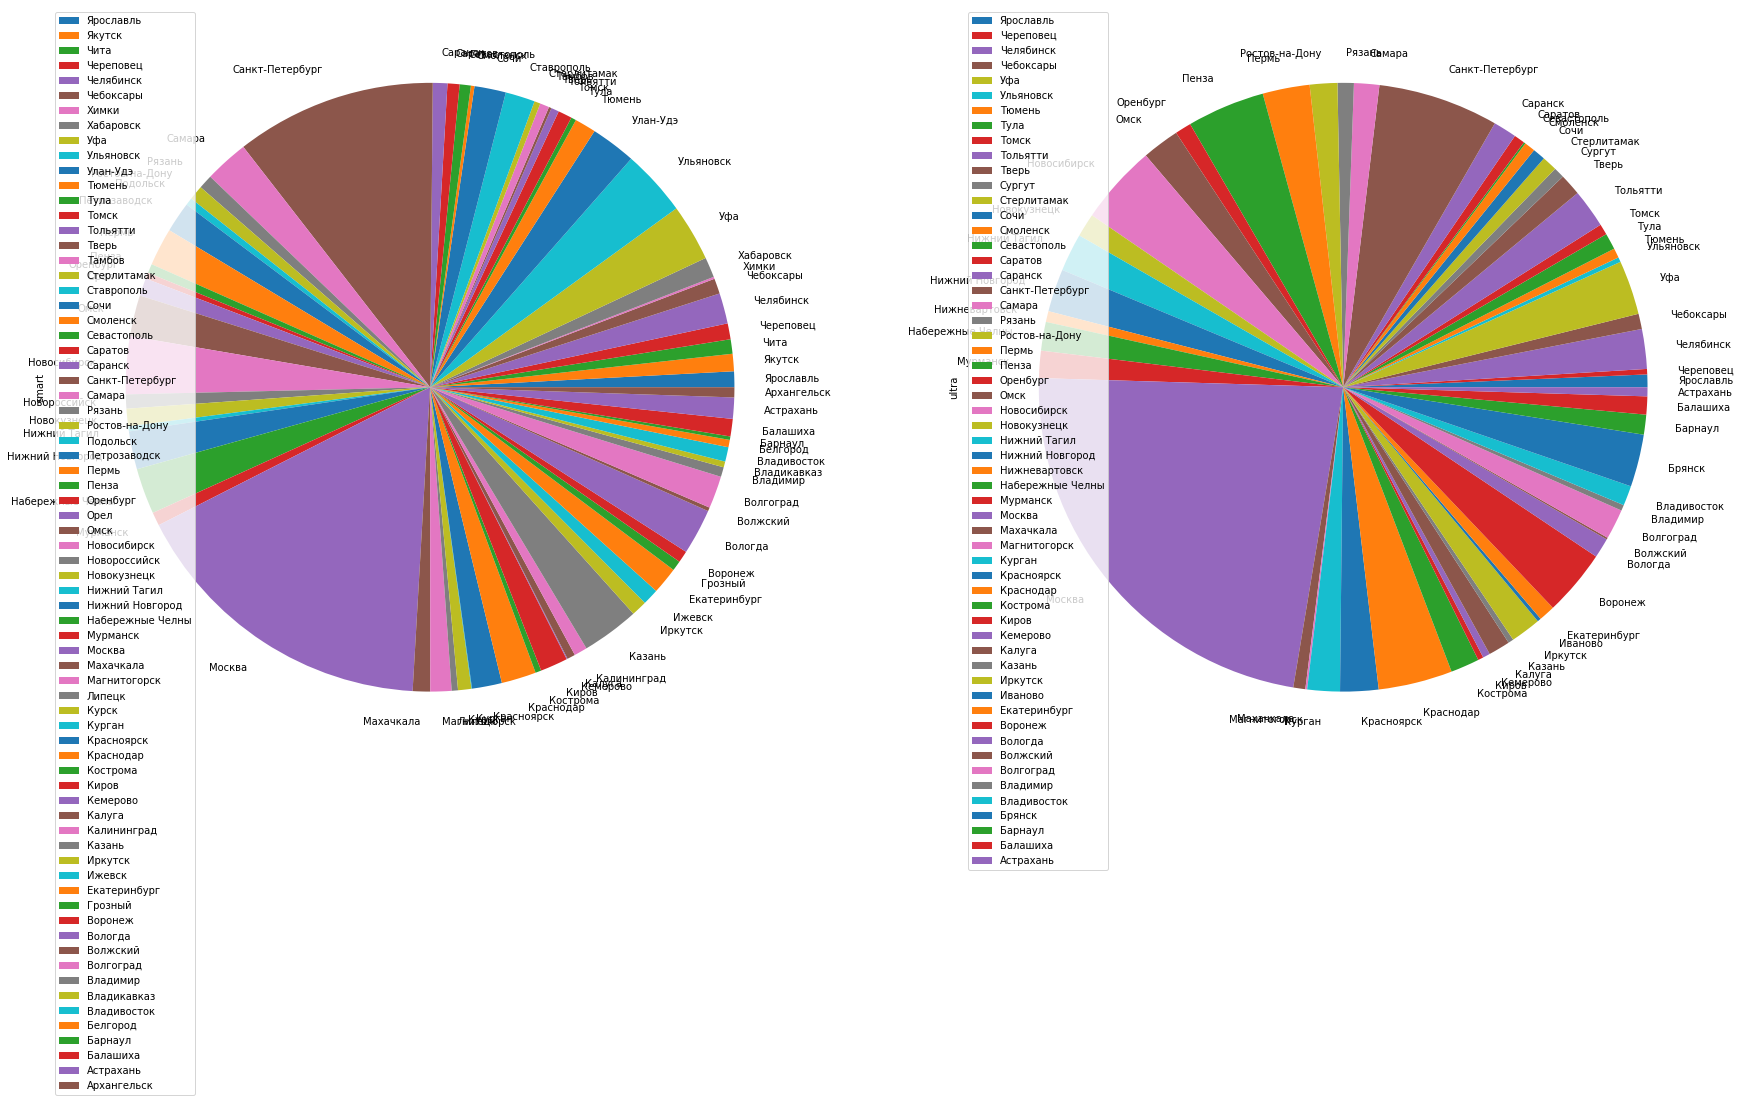

In [160]:
city_pivot.sort_values('city', ascending=False).plot(subplots=True, figsize=(30,30),kind='pie')

Диаграммы явно являются показательными, но только в абсолютных величинах. А если посмотреть на средние значения, будут ли также отличаться Москва и Санкт_Петербург от других городов?

In [161]:
city_pivot2 = city_table.pivot_table(index='city', columns='tariff', values='revenue_calculation_sum', aggfunc='mean')

In [162]:
city_pivot2

tariff,smart,ultra
city,,
Архангельск,"1,238.50",nan
Астрахань,"1,252.36","1,950.00"
Балашиха,"1,168.32","1,950.00"
Барнаул,726.86,"1,950.00"
Белгород,721.27,nan
...,...,...
Челябинск,"1,499.27","1,950.00"
Череповец,"2,129.73","1,950.00"
Чита,"1,182.56",nan


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3caf2f12d0>,
      dtype=object)

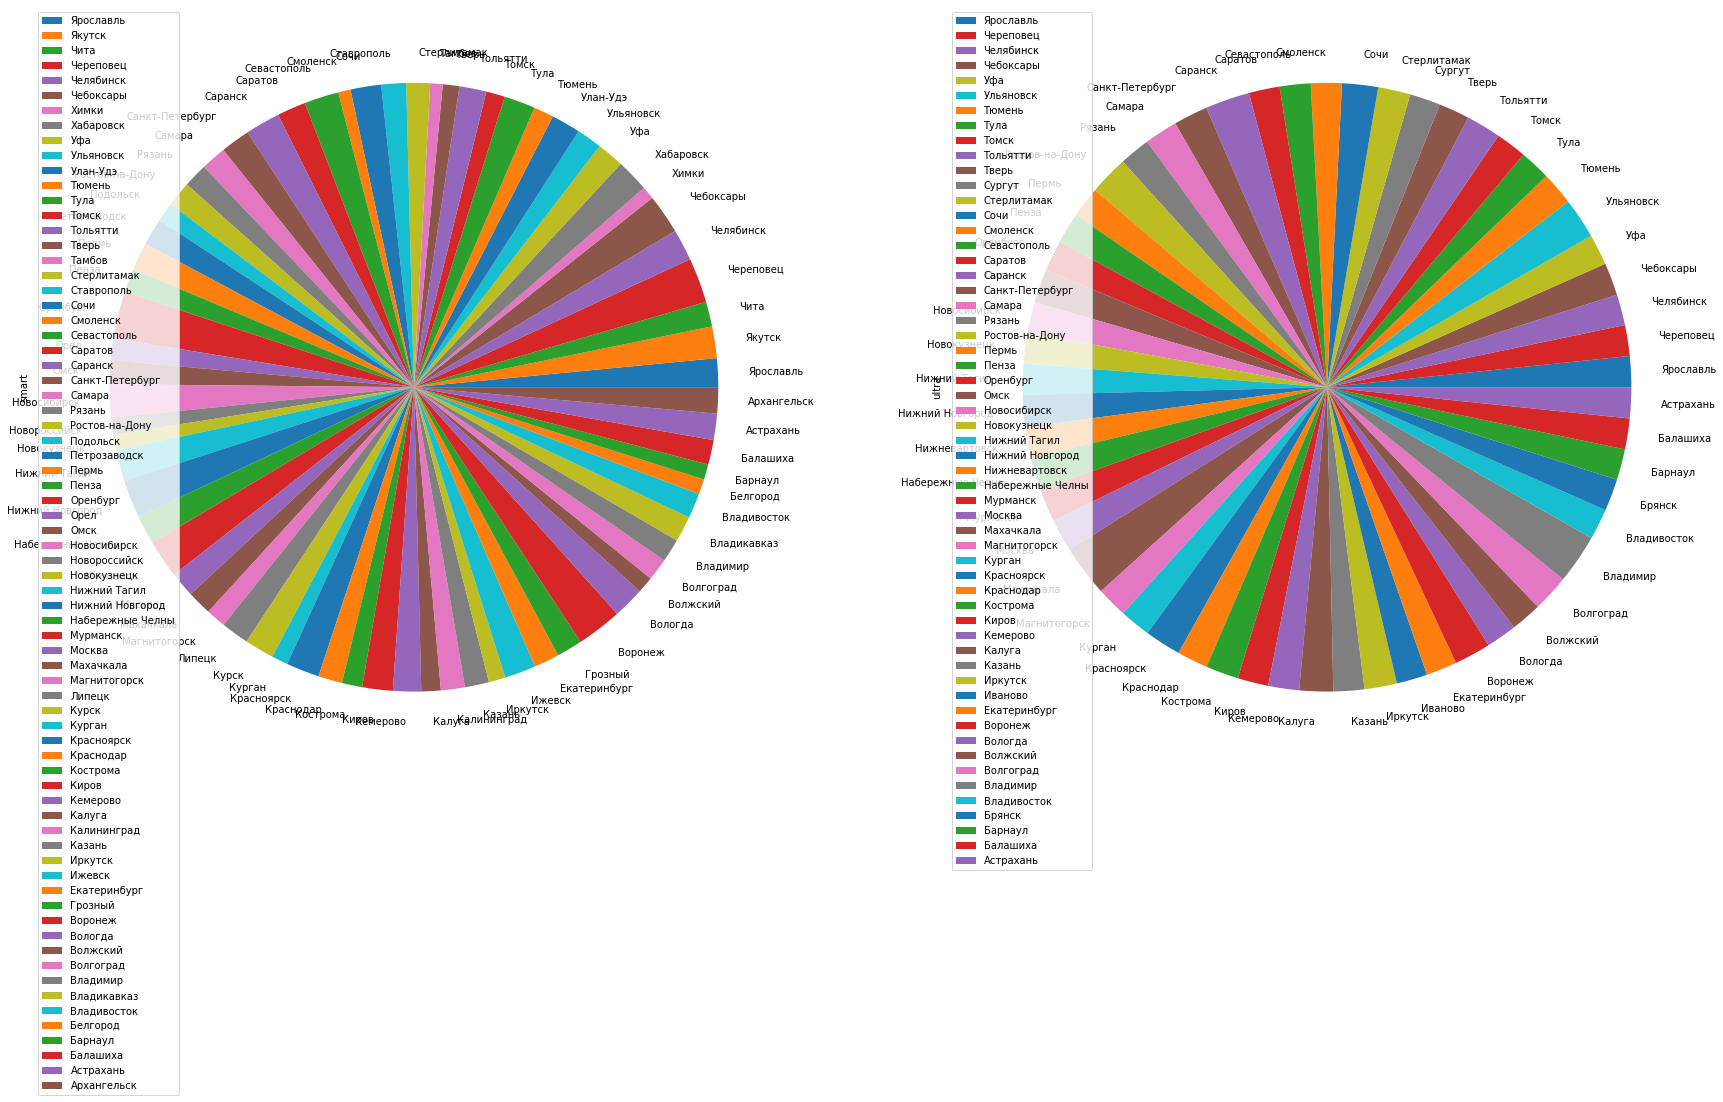

In [163]:
city_pivot2.sort_values('city', ascending=False).plot(subplots=True, figsize=(30,30),kind='pie')

---

Вывод:

Вот такие симпатичные получились цветочки. Как видим, средние показатели сразу нивелировали такие ярко выделявшиеся по абсолютным значениям города, как Москва и Санкт_Петербург. Запрос на более дешёвый тарифный план 'Smart' более востребован - география его распространения покрывает на 15 городов больше, чем тариф 'Ultra' (72 против 57). Кроме того, по абсолютным значениям выручки 'Smart' также превзошёл своего собрата (2.77 млн. руб. против 2.03 млн. руб. у 'Ultra'). Возьмём на себя смелость выдвинуть предположение, что при привлечении абонентов к тарифу 'Ultra' в тех городах, где работает только тарифный пакет 'Smart', показатели выручки сравнялись бы или даже более дорогой тарифный пакет превзошёл бы по выручке 'Smart'. Впрочем, для  поиска ответа на этот вопрос не мешало бы провести дополнительное исследование, связанное как с изучением критериев популярности того или иного тарифного пакета по городам, так и причин, заставляющих абонентов отказаться от использования этого тарифа. Впрочем, эта тематика несколько выходит за рамки данного исследования. Резюмируя, заметим, что по абсолютным показателям выручки тарифы не сильно отличаются друг от друга. Добавим, что коэфициент их корреляции составляет 0.87, что является обозначением высокой зависимости двух переменных.

---

Выше мы уже упоминали то обстоятельство, что ставя перед собой столь абстрактную задачу, как описание поведения клиентов, - реализацию задачи подчиним той же абстракции, без конкретики. Позволим себе ещё немного вольности и, перед тем, как приступить к непосредственному сравнению трафиков, посмотрим на них сквозь призму возраста. Есть предположение, что из этого можно получить не только интересные, но и полезные в прикладном применении результаты.

In [164]:
age_table = df[['user_id', 'age', 'tariff', 'revenue_calculation_sum']]

In [165]:
age_table

,user_id,age,tariff,revenue_calculation_sum
0,1000,52,ultra,1950
1,1000,52,ultra,1950
2,1000,52,ultra,1950
3,1000,52,ultra,1950
4,1000,52,ultra,1950
...,...,...,...,...
3211,1489,35,smart,946
3212,1489,35,smart,981
3213,1489,35,smart,1395
3214,1489,35,smart,924


Распределим пользоватилей на 4 возрастные группы

In [166]:
age_table['quartile'] = pd.qcut(age_table['age'], 4, ['q1','q2','q3','q4'])

In [167]:
age_table

,user_id,age,tariff,revenue_calculation_sum,quartile
0,1000,52,ultra,1950,q3
1,1000,52,ultra,1950,q3
2,1000,52,ultra,1950,q3
3,1000,52,ultra,1950,q3
4,1000,52,ultra,1950,q3
...,...,...,...,...,...
3211,1489,35,smart,946,q2
3212,1489,35,smart,981,q2
3213,1489,35,smart,1395,q2
3214,1489,35,smart,924,q2


In [168]:
age = age_table.groupby('quartile')['age'].unique()

In [169]:
age_arr = [age['q1'], age['q2'], age['q3'], age['q4']]

In [170]:
age_arr

[array([23, 20, 28, 19, 29, 25, 30, 27, 26, 32, 21, 24, 18, 31, 22]),
 array([36, 40, 41, 44, 43, 46, 45, 42, 37, 39, 33, 38, 35, 34]),
 array([52, 58, 61, 47, 54, 60, 48, 62, 53, 55, 59, 50, 51, 56, 49, 57]),
 array([68, 71, 63, 73, 64, 70, 69, 67, 74, 75, 66, 65, 72])]

In [171]:
age_table.groupby('quartile')['age'].count()

quartile
q1    830
q2    784
q3    825
q4    777
Name: age, dtype: int64

Итого: мы имеем 4 возрастные группы разбитые по квартилям.
- q1 - с 18 до 32 лет - 830 человек
- q2 - c 33 до 46 лет - 784 человека
- q3 - с 47 до 62 лет - 825 человек
- q4 - c 63 до 75 лет - 777 человек

Создадим сводную таблицу

In [172]:
age_pivot = age_table.pivot_table(index='quartile', columns='tariff', values='revenue_calculation_sum', aggfunc='sum')

In [173]:
age_pivot

tariff,smart,ultra
quartile,,
q1,691328,570215
q2,685202,507811
q3,767125,408830
q4,634434,547264


Представим полученные значения в виде круговых диаграмм

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cad576d10>,
      dtype=object)

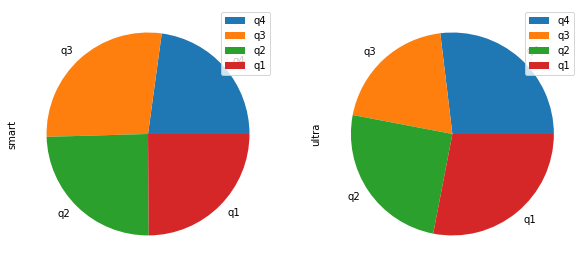

In [174]:
age_pivot.sort_values('quartile', ascending=False).plot(subplots=True, figsize=(10,10),kind='pie')

Для убедительности посмотрим на значения на графике 

Text(0, 0.5, 'Выручка (в рублях)')

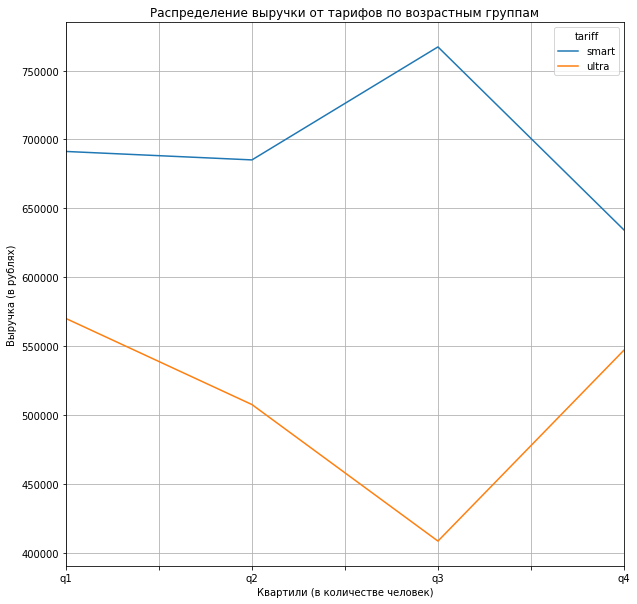

In [175]:
ax = age_pivot.plot(grid=True, figsize=(10,10), title='Распределение выручки от тарифов по возрастным группам')

ax.set_xlabel('Квартили (в количестве человек)')
ax.set_ylabel('Выручка (в рублях)')

---

Вывод:

**Примечание к выводам: количество пользователей в изначальной выборке таблицы users составляет 500 человек. Но поскольку мы учитываем помесячные колебания в оплате пакета каждым пользователем, а известно, что не все пользователи пользовались тарифом все 12 месяцев - правильнее говорить не о количестве человек, а о количестве случаев (а их имеется 3216). Однако для удобства описания выводов, мы будем всё же использовать термины "человек", "абонент" и "пользователь" вместо термина "случай". Для чистоты картины следует учитывать эту оговорку.** 

Напомним, какие возрастные группы содержатся в каждой квартиле:
- q1 - с 18 до 32 лет - 830 человек
- q2 - c 33 до 46 лет - 784 человека
- q3 - с 47 до 62 лет - 825 человек
- q4 - c 63 до 75 лет - 777 человек

А также сумма выручки для каждого тарифа по квартилям:
- q1 - "smart" - 	691328	- "ultra" - 570215 - 1 261 543 рублей
- q2 - "smart" -	685202	- "ultra" - 507811 - 1 193 013 рублей
- q3 - "smart" -	767125	- "ultra" - 408830 - 1 175 955 рублей
- q4 - "smart" -	634434	- "ultra" - 547264 - 1 181 698 рублей

Итоговая сумма выручки по каждому тарифному пакету:
- "smart" - 2 778 089 рублей
- "ultra" - 2 034 120 рублей

 Для проверки сравним с теми результатами, что мы получили при исследовании городов:
- 2.77 млн. руб. у "smart" против 2.03 млн. руб. у "ultra") 

Как видим, значения совпадают, значит ничего не упустили.

- Обратим внимание на то, что наибольшую выручку компании "Мегалайн" приносят абоненты в возрасте от 47 до 62 лет, пользователи тарифа "smart". Впрочем, наименьшую приносят они же, но для тарифа "ultra".
- Тариф "smart" является лидируюшим по каждой возрастной категории в плане получения выручки.
- Стоит обратить внимание и на динамику по выручке сквозь призму возрастов. Пик потребления дорогих тарифов "ultra" приходится на возрастную группу от 18 до 32 лет. С повышением возраста то ли интерес к приобретению этого пакета, то ли активность его использования неуклонно падает. Вплоть до возрастной группы от 63 до 75 лет. В этой группе интерес (или активность) столь же активно возрастает, но, впрочем, так и не достигает пика, выявленного для самой младшей возрастной группы. Предположение, которое возникает - последняя категория - q4 - по всей видимости пенсионеры. И, располагая большим количеством времени и, возможно, меньшей физической активностью, они склонны к большему общению по телефону. Это, разумеется, не более чем предположение, однако для получения в будущем более прикладных выводов, не мешало бы расширить исследования и в этом направлении.  

### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

In [176]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950


Создадим сводную таблицу для медианного значения затраченных минут на звонки, количество сообщений и объём интернет-трафика в месяц по тарифам

In [177]:
def calculate_median(df, values):
    # В качестве функции, применяемой к значениям сводной таблицы, используем медиану
    calls_in_month = df.pivot_table(index='month', columns='tariff', values=values, aggfunc='median')
    # Переименуем индексы (месяцы), вместо названия месяца обозначим его порядковый номер. 
    # Это нужно для полного вывода информации на график по оси х - месяцы.
    calls_in_month.rename(index = {'April': 4, 'August': 8, 'December': 12, 'February': 2, 
                               'January': 1, 'July': 7, 'June': 6, 'March': 3, 'May': 5, 
                               'November': 11, 'October': 10, 'September': 9}, inplace = True)
    # Упорядочим месяца по порядковому номеру
    table_month = calls_in_month.sort_values(by='month')
    return table_month


In [178]:
minute_sum = calculate_median(df, 'minute_sum')

In [179]:
minute_sum

tariff,smart,ultra
month,,
1,162.50,382.00
2,258.00,168.00
3,409.00,403.00
4,368.50,453.00
5,433.00,519.00
6,400.00,479.00
7,414.00,542.00
8,432.00,500.00
9,435.00,520.00


Отобразим информацию на графике

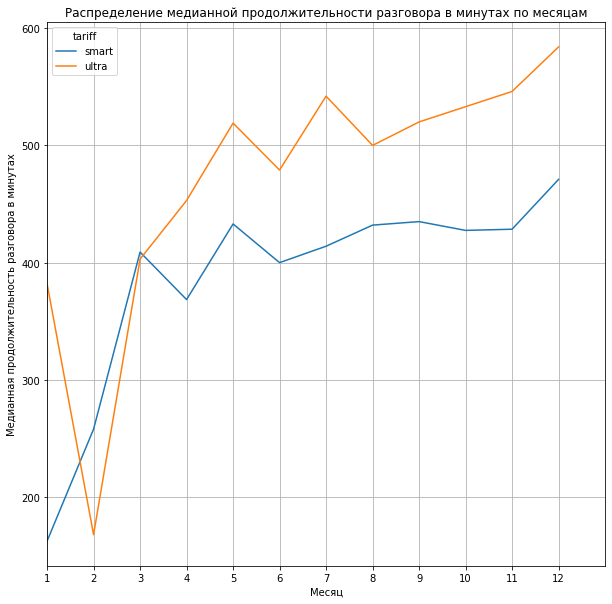

In [180]:
ax = minute_sum.plot(grid=True, figsize=(10,10), title='Распределение медианной продолжительности разговора в минутах по месяцам')

ax.set_xlabel('Месяц')
ax.set_ylabel('Медианная продолжительность разговора в минутах')
plt.xlim([1, 13])
ax.set_xticks(minute_sum.index)


In [181]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950


In [182]:
years_median_minute = df[['tariff', 'minute_sum']]

In [183]:
years_pivot_minute = years_median_minute.pivot_table(index='tariff', values='minute_sum', aggfunc='median')

In [184]:
years_pivot_minute

,minute_sum
tariff,
smart,421.50
ultra,518.00


Как видим, места пересечения двух тарифов - февраль и март.Февраль является самым низким по медианному количеству минут для тарифного пакета "ultra" (причём, как внутри пакета, так и по сравнению с пакетом "smart" - это единственный месяц, в котором показатели расхода минут пользователей пакета "ultra" меньше конкурирующих показателей; разница составляет 90 минут в пользу поьзователей "smart"). В марте медианные значения израсходованных минут для обоих тарифов практически сравниваются. Во все другие месяца мы наблюдаем явное преимущество по количеству израсходованных минут за пакетом "ultra". Медианный годовой показатель для "ultra" составляет 518 минут против 421.50 для тарифа "smart". Интересна динамика распределения использованных минут по месяцам. Если вынести за скобки рассмотрения столь низкий показатель  по минутам пакета "ultra" за февраль (кстати, тоже интересно, почему именно февраль? какова вероятность того, что это связано с тем, что он самый короткий месяц в году?), то для обоих тарифных планов самым низким показателем является январь. Самым высоким по затраченным минутам - декабрь. Наблюдается явная динамика роста от самого низкого к самому высокому показателю затраченных минут. 

Создадим сводную таблицу для медианного значения затраченных сообщений в месяц по тарифам

In [185]:
messages_count = calculate_median(df, 'messages_count')

In [186]:
messages_count

tariff,smart,ultra
month,,
1,15.00,32.00
2,20.00,5.50
3,23.00,20.00
4,28.00,17.00
5,30.00,25.00
6,28.00,27.50
7,29.00,38.00
8,27.00,40.00
9,30.00,43.00


Отобразим информацию на графике

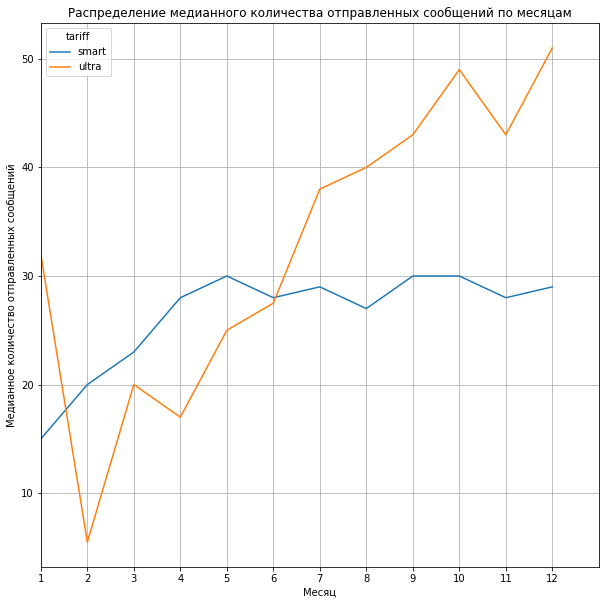

In [187]:
ax = messages_count.plot(grid=True, figsize=(10,10), title='Распределение медианного количества отправленных сообщений по месяцам')

ax.set_xlabel('Месяц')
ax.set_ylabel('Медианное количество отправленных сообщений')
plt.xlim([1, 13])
ax.set_xticks(messages_count.index)


In [188]:
years_median_messages = df[['tariff', 'messages_count']]

In [189]:
years_pivot_messages = years_median_messages.pivot_table(index='tariff', values='messages_count', aggfunc='median')

In [190]:
years_pivot_messages

,messages_count
tariff,
smart,28
ultra,38


С количеством сообщений по тарифным пакетам ситуация несколько отличается от затраченных минут. Во-первых, на протяжении пяти  месяцев (с февраля по июнь включительно) количество сообщений от абонентов "ultra" меньше чем количество сообщений абонентов "smart". С июля  количество сообщений абонентов "ultra" резко отрывается вверх от абонентов "smart" и продолжает расти, заканчиваясь пиком в декабре. С января начинается проседание показателей. У абонентов "smart" проседание по количеству сообщений наблюдается на протяжении первых трёх месяцев (с января по март включительно). В дальнейшем мы наблюдаем примерно типичное использование сообщений (около 30 в месяц). Медианой за год для "smart" является 28 сообщений, для "ultra" - 38 сообщений. 

Создадим сводную таблицу для медианного значения объёма интернет-трафика в месяц по тарифам

In [191]:
mb_sum = calculate_median(df, 'mb_sum')

In [192]:
mb_sum

tariff,smart,ultra
month,,
1,"7,107.00","14,808.00"
2,"12,572.50","7,335.50"
3,"15,690.00","17,513.00"
4,"14,104.50","16,662.00"
5,"16,343.00","18,717.00"
6,"16,095.50","19,495.50"
7,"15,948.00","20,034.00"
8,"16,855.00","18,945.00"
9,"16,050.00","19,675.00"


Отобразим информацию на графике

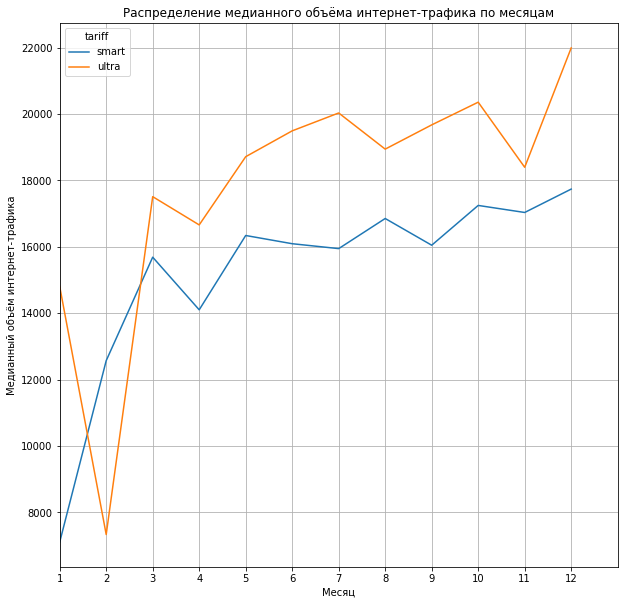

In [193]:
ax = mb_sum.plot(grid=True, figsize=(10,10), title='Распределение медианного объёма интернет-трафика по месяцам')

ax.set_xlabel('Месяц')
ax.set_ylabel('Медианный объём интернет-трафика')
plt.xlim([1, 13])
ax.set_xticks(mb_sum.index)


In [194]:
years_median_mb = df[['tariff', 'mb_sum']]

In [195]:
years_pivot_mb = years_median_mb.pivot_table(index='tariff', values='mb_sum', aggfunc='median')

In [196]:
years_pivot_mb

,mb_sum
tariff,
smart,16529
ultra,19320


Как видим, динамика использования интернет-трафика по месяцам напоминает динамику по звонкам. Такое же проседание в феврале для абонентов 'ultra', такие же максимальные значения объёма использованного трафика для абонентов обоих тарифов в декабре. Кроме выпадающего февраля, для абонентов 'ultra', остальные месяца показывают явно большее потребление трафика по сравнению с абонентами 'smart'. Медианным месячным значениям по показателям за год по использованным мегабайтам является 16529 мб для абонентов 'smart' и 19320 мб для абонентов 'ultra'.

### Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

In [197]:
df

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,August,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,December,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,July,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,June,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,May,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3210,1489,Павел,Гончаров,35,Санкт-Петербург,smart,December,0,35,17341,NaN,50,15360,500,550,200,3,3,550,0,396,946
3212,3211,1489,Павел,Гончаров,35,Санкт-Петербург,smart,November,0,20,17516,NaN,50,15360,500,550,200,3,3,550,0,431,981
3213,3212,1489,Павел,Гончаров,35,Санкт-Петербург,smart,October,0,21,19588,NaN,50,15360,500,550,200,3,3,550,0,845,1395
3214,3213,1489,Павел,Гончаров,35,Санкт-Петербург,smart,September,0,32,17232,NaN,50,15360,500,550,200,3,3,550,0,374,924


Создадим таблицу с колонками по затраченным минутам, сообщениям, мегабайтам и общей суммой выручки. Переименуем индексы (месяцы), вместо названия месяца обозначим его порядковый номер. 
Это нужно для полного вывода информации на график по оси х - месяцы.

In [198]:
new_df = df

In [199]:
new_df.replace({'month': {'April': 4, 'August': 8, 'December': 12, 'February': 2, 
                               'January': 1, 'July': 7, 'June': 6, 'March': 3, 'May': 5, 
                               'November': 11, 'October': 10, 'September': 9}}, inplace=True)

In [200]:
new_df['month'] = new_df['month'].fillna(8)

In [201]:
new_df.head(15)

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,8.00,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,12.00,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,7.00,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,6.00,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,5.00,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
5,5,1000,Рафаил,Верещагин,52,Краснодар,ultra,11.00,338,58,14768,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
6,6,1000,Рафаил,Верещагин,52,Краснодар,ultra,10.00,350,73,14717,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
7,7,1000,Рафаил,Верещагин,52,Краснодар,ultra,9.00,466,57,14581,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
8,17,1003,Белла,Белякова,23,Москва,ultra,8.00,380,37,8571,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
9,18,1003,Белла,Белякова,23,Москва,ultra,12.00,802,75,10132,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950


In [202]:
new_df

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,8.00,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,12.00,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,7.00,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,6.00,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,5.00,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3210,1489,Павел,Гончаров,35,Санкт-Петербург,smart,12.00,0,35,17341,NaN,50,15360,500,550,200,3,3,550,0,396,946
3212,3211,1489,Павел,Гончаров,35,Санкт-Петербург,smart,11.00,0,20,17516,NaN,50,15360,500,550,200,3,3,550,0,431,981
3213,3212,1489,Павел,Гончаров,35,Санкт-Петербург,smart,10.00,0,21,19588,NaN,50,15360,500,550,200,3,3,550,0,845,1395
3214,3213,1489,Павел,Гончаров,35,Санкт-Петербург,smart,9.00,0,32,17232,NaN,50,15360,500,550,200,3,3,550,0,374,924


In [203]:
data_tariffs = new_df.pivot_table(index=['month', 'tariff'], 
                                  values=['minute_sum', 'messages_count', 'mb_sum', 'revenue_calculation_sum'], 
                                  aggfunc='median')


In [204]:
data_tariffs

mb_sum  messages_count  minute_sum  revenue_calculation_sum
month tariff                                                               
1.00  smart   7,107.00           15.00      162.50                   550.00
      ultra  14,808.00           32.00      382.00                 1,950.00
2.00  smart  12,572.50           20.00      258.00                   550.00
      ultra   7,335.50            5.50      168.00                 1,950.00
3.00  smart  15,690.00           23.00      409.00                   881.00
      ultra  17,513.00           20.00      403.00                 1,950.00
4.00  smart  14,104.50           28.00      368.50                   587.50
      ultra  16,662.00           17.00      453.00                 1,950.00
5.00  smart  16,343.00           30.00      433.00                   945.00
      ultra  18,717.00           25.00      519.00                 1,950.00
6.00  smart  16,095.50           28.00      400.00                   885.00
      ultra  19,495.50           27.50      479.00                 1,950.00
7.00  smart  15,948.00           29.00      414.00                   922.00
      ultra  20,034.00           38.00      542.00                 1,950.00
8.00  smart  16,853.50           27.00      431.50                   976.00
      ultra  18,820.50           38.50      498.00                 1,950.00
9.00  smart  16,050.00           30.00      435.00                   941.00
      ultra  19,675.00           43.00      520.00                 1,950.00
10.00 smart  17,248.50           30.00      427.50                 1,067.00
      ultra  20,359.00           49.00      533.00                 1,950.00
11.00 smart  17,036.50           28.00      428.50                 1,107.50
      ultra  18,398.00           43.00      546.00                 1,950.00
12.00 smart  17,741.00           29.00      471.00                 1,206.00
      ultra  21,994.00           51.00      584.00                 1,950.00

Изменим тип всех числовых колонок на целочисленный

In [205]:
def return_int(column):
    data_tariffs[column] = data_tariffs[column].astype('int')

In [206]:
return_int('mb_sum')

In [207]:
return_int('messages_count')

In [208]:
return_int('minute_sum')

In [209]:
return_int('revenue_calculation_sum')

In [210]:
data_tariffs

mb_sum  messages_count  minute_sum  revenue_calculation_sum
month tariff                                                             
1.00  smart     7107              15         162                      550
      ultra    14808              32         382                     1950
2.00  smart    12572              20         258                      550
      ultra     7335               5         168                     1950
3.00  smart    15690              23         409                      881
      ultra    17513              20         403                     1950
4.00  smart    14104              28         368                      587
      ultra    16662              17         453                     1950
5.00  smart    16343              30         433                      945
      ultra    18717              25         519                     1950
6.00  smart    16095              28         400                      885
      ultra    19495              27         479                     1950
7.00  smart    15948              29         414                      922
      ultra    20034              38         542                     1950
8.00  smart    16853              27         431                      976
      ultra    18820              38         498                     1950
9.00  smart    16050              30         435                      941
      ultra    19675              43         520                     1950
10.00 smart    17248              30         427                     1067
      ultra    20359              49         533                     1950
11.00 smart    17036              28         428                     1107
      ultra    18398              43         546                     1950
12.00 smart    17741              29         471                     1206
      ultra    21994              51         584                     1950

Посмотрим на медиану, среднее, дисперсию и стандартное отклонение для мегабайт по тарифам

In [211]:
data_tariffs.groupby('tariff')\
  .agg({'mb_sum':['median','mean','var','std']})\
  .style.format("{:.2f}")

Так же взглянем на среднее, медиану, дисперсию и стандартное отклонение для сообщений

In [212]:
data_tariffs.groupby('tariff')\
  .agg({'messages_count':['median','mean','var','std']})\
  .style.format("{:.2f}")

Для звонков в минутах

In [213]:
data_tariffs.groupby('tariff')\
  .agg({'minute_sum':['median','mean','var','std']})\
  .style.format("{:.2f}")

Создадим таблицу отдельно для абонентов тарифа 'smart', для удобства дальнейшего сравнения с контрагентами по столбцам

In [214]:
data_tariffs = data_tariffs.reset_index()

In [215]:
def build_smart():
    data_smart = data_tariffs[data_tariffs['tariff'] == 'smart']
    return data_smart

In [216]:
data_smart = build_smart()

In [217]:
data_smart

,month,tariff,mb_sum,messages_count,minute_sum,revenue_calculation_sum
0,1.00,smart,7107,15,162,550
2,2.00,smart,12572,20,258,550
4,3.00,smart,15690,23,409,881
6,4.00,smart,14104,28,368,587
8,5.00,smart,16343,30,433,945
10,6.00,smart,16095,28,400,885
12,7.00,smart,15948,29,414,922
14,8.00,smart,16853,27,431,976
16,9.00,smart,16050,30,435,941
18,10.00,smart,17248,30,427,1067


Теперь создадим таблицу отдельно для абонентов 'ultra'

In [218]:
def build_ultra():
    data_ultra = data_tariffs[data_tariffs['tariff'] == 'ultra']
    return data_ultra

In [219]:
data_ultra = build_ultra()

In [220]:
data_ultra

,month,tariff,mb_sum,messages_count,minute_sum,revenue_calculation_sum
1,1.00,ultra,14808,32,382,1950
3,2.00,ultra,7335,5,168,1950
5,3.00,ultra,17513,20,403,1950
7,4.00,ultra,16662,17,453,1950
9,5.00,ultra,18717,25,519,1950
11,6.00,ultra,19495,27,479,1950
13,7.00,ultra,20034,38,542,1950
15,8.00,ultra,18820,38,498,1950
17,9.00,ultra,19675,43,520,1950
19,10.00,ultra,20359,49,533,1950


In [221]:
def stat(column):
    pivot1 = data_smart.pivot_table(index='month', values=column, aggfunc='mean')
    pivot2 = data_ultra.pivot_table(index='month', values=column, aggfunc='mean')
    
    pivot3 = pivot1.join(pivot2, rsuffix='_u')
    pivot3.columns = ['smart', 'ultra']
    pivot3['smart']=round(pivot3['smart'])
    pivot3['ultra']=round(pivot3['ultra'])
    return pivot3

Среднее значение для звонков

Text(0, 0.5, 'Минуты')

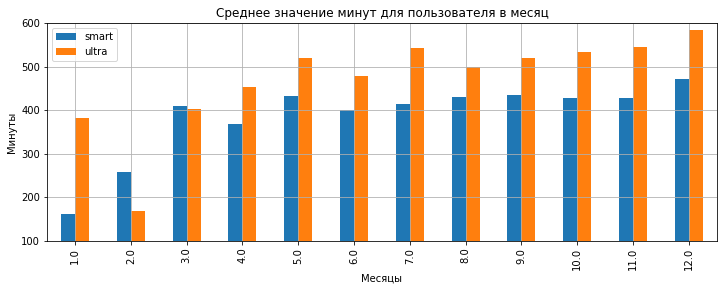

In [222]:
stat('minute_sum').plot.bar(
    title='Среднее значение минут для пользователя в месяц', 
                            grid=True, figsize=(12,4), ylim=(100, 600))
plt.xlabel('Месяцы')
plt.ylabel('Минуты')

Text(0, 0.5, 'Мегабайты')

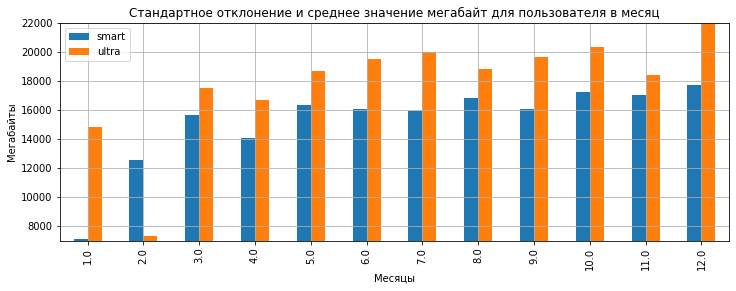

In [223]:
stat('mb_sum').plot.bar(
    title='Стандартное отклонение и среднее значение мегабайт для пользователя в месяц', 
                            grid=True, figsize=(12,4), ylim=(7000, 22000))
plt.xlabel('Месяцы')
plt.ylabel('Мегабайты')

Text(0, 0.5, 'Сообщения')

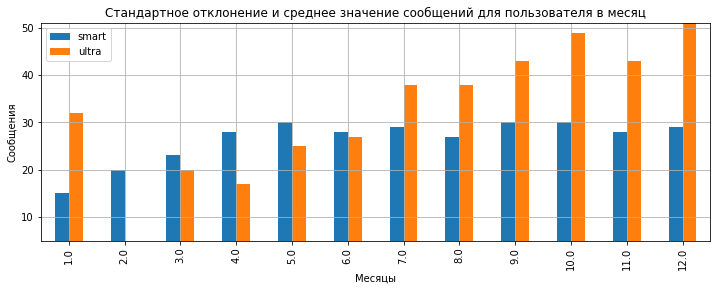

In [224]:
stat('messages_count').plot.bar(
    title='Стандартное отклонение и среднее значение сообщений для пользователя в месяц', 
                            grid=True, figsize=(12,4), ylim=(5, 51))
plt.xlabel('Месяцы')
plt.ylabel('Сообщения')

Text(0, 0.5, 'Выручка(в рублях)')

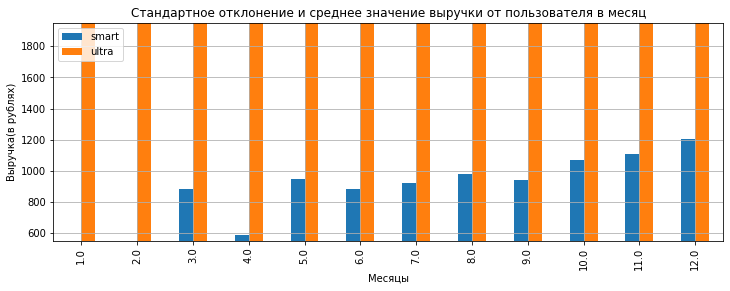

In [225]:
stat('revenue_calculation_sum').plot.bar(
    title='Стандартное отклонение и среднее значение выручки от пользователя в месяц', 
                            grid=True, figsize=(12,4), ylim=(550, 1950))
plt.xlabel('Месяцы')
plt.ylabel('Выручка(в рублях)')

Text(0, 0.5, 'Количество зарегистрированных случаев')

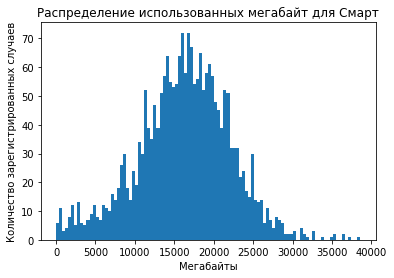

In [278]:
df[df['tariff'] == 'smart']['mb_sum'].plot(kind='hist', bins=100)
plt.title('Распределение использованных мегабайт для Смарт')
plt.xlabel('Мегабайты')
plt.ylabel('Количество зарегистрированных случаев')

Text(0, 0.5, 'Количество зарегистрированных случаев')

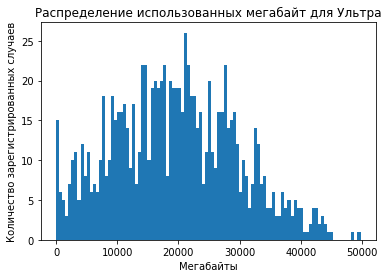

In [290]:
df[df['tariff'] == 'ultra']['mb_sum'].plot(kind='hist', bins=100)
plt.title('Распределение использованных мегабайт для Ультра')
plt.xlabel('Мегабайты')
plt.ylabel('Количество зарегистрированных случаев')

На обоих гистограммах мы наблюдаем нормальное распределение использованных мегабайт. Для пользователей Смарта (с медианой в 16 гб) характерно превышение заложенных в лимите мегабайт (15 гб). Для пользователей Ультры (с медианой в 19 гб) превышение лимита в 30 гб тоже выявлено, но гароздо менее характерно.

Text(0, 0.5, 'Количество зарегистрированных случаев')

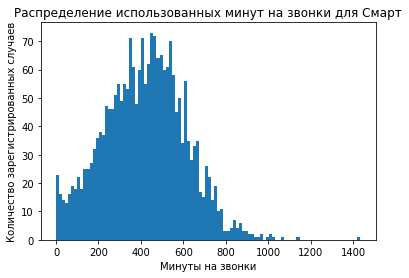

In [292]:
df[df['tariff'] == 'smart']['minute_sum'].plot(kind='hist', bins=100)
plt.title('Распределение использованных минут на звонки для Смарт')
plt.xlabel('Минуты на звонки')
plt.ylabel('Количество зарегистрированных случаев')

Text(0, 0.5, 'Количество зарегистрированных случаев')

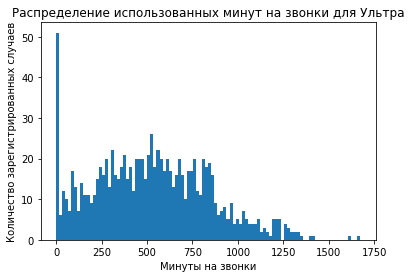

In [289]:
df[df['tariff'] == 'ultra']['minute_sum'].plot(kind='hist', bins=100)
plt.title('Распределение использованных минут на звонки для Ультра')
plt.xlabel('Минуты на звонки')
plt.ylabel('Количество зарегистрированных случаев')

Пользователи Смарта уже в своём медианном значении (417 минут) почти достигли лимита по минутам (500 минут). Для них характерен выход за рамки лимита. Пользователи же Ультры так и не

Text(0, 0.5, 'Количество зарегистрированных случаев')

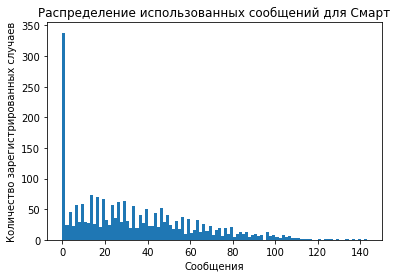

In [293]:
df[df['tariff'] == 'smart']['messages_count'].plot(kind='hist', bins=100)
plt.title('Распределение использованных сообщений для Смарт')
plt.xlabel('Сообщения')
plt.ylabel('Количество зарегистрированных случаев')

Text(0, 0.5, 'Количество зарегистрированных случаев')

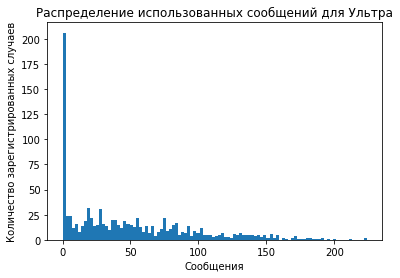

In [294]:
df[df['tariff'] == 'ultra']['messages_count'].plot(kind='hist', bins=100)
plt.title('Распределение использованных сообщений для Ультра')
plt.xlabel('Сообщения')
plt.ylabel('Количество зарегистрированных случаев')

In [227]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,8.00,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,12.00,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,7.00,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,6.00,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,5.00,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950


Создадим пару функций для выведения информации в виде таблицы и гистограммы о распределении статистических признаков минут, сообщений и  мегабайт в разрезе тарифов.

In [228]:
def stat_table(column):
    stat = df.groupby('tariff').agg({column:['median', 'mean']})
    return stat

In [229]:
def stat_plot(df, title, from_y, to_y, name):
    df.plot.bar(
    title=title, 
    grid=True, figsize=(12,4), ylim=(from_y, to_y))
    plt.xlabel('Статистические признаки')
    plt.ylabel(name)

In [230]:
minute_table = stat_table('minute_sum')

In [231]:
minute_table

minute_sum       
           median   mean
tariff                  
smart      421.50 417.75
ultra      518.00 526.09

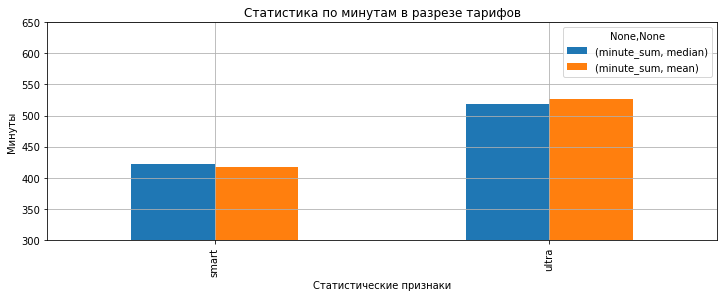

In [232]:
stat_plot(minute_table, 'Статистика по минутам в разрезе тарифов', 300, 650, 'Минуты')

In [233]:
mb_table = stat_table('mb_sum')

In [234]:
mb_table

mb_sum          
       median      mean
tariff                 
smart   16529 16,221.91
ultra   19320 19,467.14

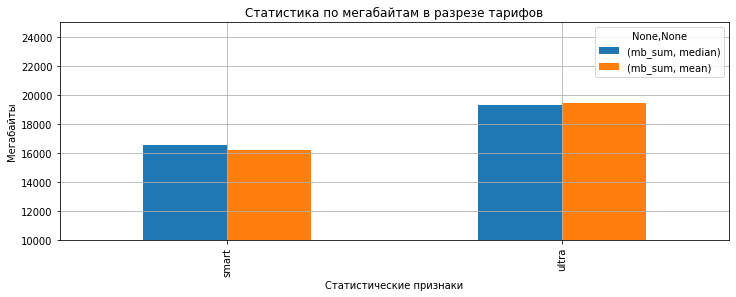

In [235]:
stat_plot(mb_table, 'Статистика по мегабайтам в разрезе тарифов', 10000, 25000, 'Мегабайты')

In [236]:
messages_table = stat_table('messages_count')

In [237]:
messages_table

messages_count      
               median  mean
tariff                     
smart              28 33.37
ultra              38 49.31

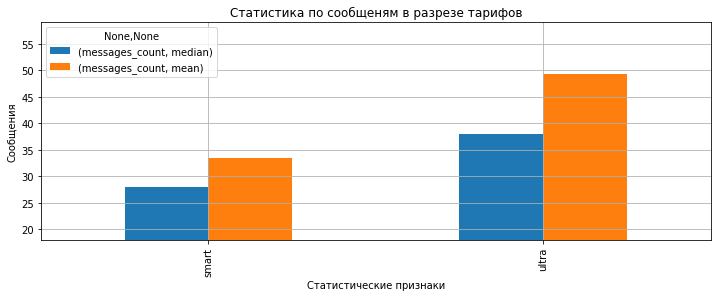

In [238]:
stat_plot(messages_table, 'Статистика по сообщеням в разрезе тарифов', 18, 59, 'Сообщения')

In [239]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Сравним статистическое распределение по тарифам с теми лимитами, которые в них заложены.

- Минуты:

- Для Смарта заложен лимитированный расход в 500 минут в месяц. По факту средний расход составляет 417, а медианный - 421 минуту в месяц.
- Для Ультры лимит 3000 минут в месяц. В действительности среднее значение - 526 минут, а медианное 518 минут в месяц.

Итог: 
- Согласно полученным данным, с точки зрения медианных значений вложения денег выигрывают пользователи Смарта - они немного не добирают до верхнего порога своего лимита, а значит остаются в логике тарифного платежа. В то время как пользователи Ультры не добирают, согласно медианным значениям, весьма существенно. Если бы пользователи Ультра разговаривали в рамках тарифа Смарт, то они бы переплатили всего ((518(медианное значение для Ультры) - 500(лимит Смарта)) * 3(стоимость перерасхода минут для Смарта) = 54 рубля! По факту же они переплачивают 1400(разница между Ультрой и Смартом) - 54(выясненная медианная переплата абонента Ультра, находись он на тарифе Смарта) = 1346 рублей. Впрочем, мы рассмотрели только минуты, а трафик складывается не только из них.

- Сообщения:

- Лимит для Смарта - 50 сообщений в месяц.
- Лимит дя Ультра - 1000 сообщений в месяц.

По факту:
- Для Смарта среднее количество отправленных сообщений в месяц - 33, медианное - 28.
- Для Ультры среднее значение 49, медианное - 38.

Итог:
- Никто из абонетов (в среднем и медианном выражениях) обоих тарифных пакетов по количеству сообщений не дотягивает не то что до максимума тарифа Ультра (1000 сообщений в месяц), но даже до верхнего порога тарифа Смарт (50 сообщений в месяц).

- Интернет-трафик:

Лимиты для:
- Смарт - 15360 мегабайт в месяц
- Ультра - 30720 мегабайт в месяц

В длействительности:
- Среднее значение для Смарт - 16,221 мегабайт, медианное - 16529 мегабайт
- Среднее значение для Ультра - 19,467 мегабайт, медианное - 19320 мегабайт

Итог:
Если опираться на медианные значения, то абоненты Смарт перерасходуют мегабайты в размере семи процентов от общих трат, в то время, как абоненты Ультра недорасходывают 37 процентов своего трафика.

### Выводы

Запрос на более дешёвый тарифный план 'Smart' более востребован - география его распространения покрывает на 15 городов больше, чем тариф 'Ultra' (72 против 57). Кроме того, по абсолютным значениям выручки 'Smart' также превзошёл своего собрата (2.77 млн. руб. против 2.03 млн. руб. у 'Ultra'). 

Обратим внимание на то, что наибольшую выручку компании "Мегалайн" приносят абоненты в возрасте от 47 до 62 лет, пользователи тарифа "smart". Впрочем, наименьшую приносят они же, но для тарифа "ultra".
Тариф "smart" является лидируюшим по каждой возрастной категории в плане получения выручки.
Стоит обратить внимание и на динамику по выручке сквозь призму возрастов. Пик потребления дорогих тарифов "ultra" приходится на возрастную группу от 18 до 32 лет.

Февраль является самым низким по медианному количеству минут для тарифного пакета "ultra" (причём, как внутри пакета, так и по сравнению с пакетом "smart" - это единственный месяц, в котором показатели расхода минут пользователей пакета "ultra" меньше конкурирующих показателей; разница составляет 90 минут в пользу поьзователей "smart"). В марте медианные значения израсходованных минут для обоих тарифов практически сравниваются. Во все другие месяца мы наблюдаем явное преимущество по количеству израсходованных минут за пакетом "ultra". Медианный годовой показатель для "ultra" составляет 518 минут против 421.50 для тарифа "smart". Интересна динамика распределения использованных минут по месяцам. Если вынести за скобки рассмотрения столь низкий показатель по минутам пакета "ultra" за февраль (кстати, тоже интересно, почему именно февраль? какова вероятность того, что это связано с тем, что он самый короткий месяц в году?), то для обоих тарифных планов самым низким показателем является январь. Самым высоким по затраченным минутам - декабрь. Наблюдается явная динамика роста от самого низкого к самому высокому показателю затраченных минут.

С количеством сообщений по тарифным пакетам ситуация несколько отличается от затраченных минут. Во-первых, на протяжении пяти месяцев (с февраля по июнь включительно) количество сообщений от абонентов "ultra" меньше чем количество сообщений абонентов "smart". С июля количество сообщений абонентов "ultra" резко отрывается вверх от абонентов "smart" и продолжает расти, заканчиваясь пиком в декабре. С января начинается проседание показателей. У абонентов "smart" проседание по количеству сообщений наблюдается на протяжении первых трёх месяцев (с января по март включительно). В дальнейшем мы наблюдаем примерно типичное использование сообщений (около 30 в месяц). Месячной медианой за год для "smart" является 28 сообщений, для "ultra" - 38 сообщений.

Динамика использования интернет-трафика по месяцам напоминает динамику по звонкам. Такое же проседание в феврале для абонентов 'ultra', такие же максимальные значения объёма использованного трафика для абонентов обоих тарифов в декабре. Кроме выпадающего февраля, для абонентов 'ultra', остальные месяца показывают явно большее потребление трафика по сравнению с абонентами 'smart'. Медианным месячным значениям по показателям за год по использованным мегабайтам является 16529 мб для абонентов 'smart' и 19320 мб для абонентов 'ultra'.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы</a></span><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Проверка гипотезы

**- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;**

**- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;**


**Пороговое значение alpha зададим самостоятельно.**

**Поясним:**

**- как мы формулировали нулевую и альтернативную гипотезы;**

**- какой критерий использовали для проверки гипотез и почему.**

Сформулируем гипотезы:

- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

Избавимся от выбросов:

In [240]:
def value_without_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

In [241]:
ultra_final = df[df['tariff'] == 'ultra']
smart_final = df[df['tariff'] == 'smart']

In [242]:
ultra_final = value_without_outliers(ultra_final, 'revenue_calculation_sum', 0)
ultra_final = ultra_final['revenue_calculation_sum']

In [243]:
ultra_final.mean()

1950.0

In [244]:
smart_final = value_without_outliers(smart_final, 'revenue_calculation_sum', 0)
smart_final = smart_final['revenue_calculation_sum']

In [245]:
smart_final.mean()

1191.498401096391

In [246]:
alpha = 0.05

In [247]:
result = st.ttest_ind(ultra_final, smart_final)

In [248]:
print(f'p-значение: {result.pvalue}')

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.936460295946136e-191
Отвергаем нулевую гипотезу


Как видим, нулевая гипотеза не подтвердилась, существуют значимые различия между выборками

Рассмотрим ситуацию по городам

Сформулируем гипотезы:

- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [249]:
df['if_moscow'] = np.where(df['city'] == 'Москва', 'Москва', 'Другой')

In [250]:
df.head()

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum,if_moscow
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,8.00,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,12.00,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,7.00,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,6.00,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,5.00,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой


In [251]:
moscow = df[df['if_moscow'] == 'Москва']
other = df[df['if_moscow'] == 'Другой']

In [252]:
moscow

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum,if_moscow
8,17,1003,Белла,Белякова,23,Москва,ultra,8.00,380,37,8571,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Москва
9,18,1003,Белла,Белякова,23,Москва,ultra,12.00,802,75,10132,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Москва
10,19,1003,Белла,Белякова,23,Москва,ultra,11.00,824,94,11368,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Москва
11,20,1003,Белла,Белякова,23,Москва,ultra,10.00,855,83,14779,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Москва
12,21,1003,Белла,Белякова,23,Москва,ultra,9.00,961,91,12479,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,3120,1490,Радомир,Алесин,30,Москва,smart,6.00,330,50,19531,NaN,50,15360,500,550,200,3,3,550,0,834,1384,Москва
3171,3121,1490,Радомир,Алесин,30,Москва,smart,5.00,339,37,21362,NaN,50,15360,500,550,200,3,3,550,0,1200,1750,Москва
3172,3122,1490,Радомир,Алесин,30,Москва,smart,11.00,282,47,18733,NaN,50,15360,500,550,200,3,3,550,0,674,1224,Москва
3173,3123,1490,Радомир,Алесин,30,Москва,smart,10.00,312,45,20690,NaN,50,15360,500,550,200,3,3,550,0,1066,1616,Москва


In [253]:
other

,index,user_id,first_name,last_name,age,city,tariff,month,minute_sum,messages_count,mb_sum,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calculation_minute,revenue_calculation_messages,revenue_calculation_mb,revenue_calculation_sum,if_moscow
0,0,1000,Рафаил,Верещагин,52,Краснодар,ultra,8.00,408,81,14070,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой
1,1,1000,Рафаил,Верещагин,52,Краснодар,ultra,12.00,333,70,9827,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой
2,2,1000,Рафаил,Верещагин,52,Краснодар,ultra,7.00,340,75,14016,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой
3,3,1000,Рафаил,Верещагин,52,Краснодар,ultra,6.00,172,60,23257,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой
4,4,1000,Рафаил,Верещагин,52,Краснодар,ultra,5.00,159,22,2256,NaN,1000,30720,3000,1950,150,1,1,1950,0,0,1950,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3210,1489,Павел,Гончаров,35,Санкт-Петербург,smart,12.00,0,35,17341,NaN,50,15360,500,550,200,3,3,550,0,396,946,Другой
3212,3211,1489,Павел,Гончаров,35,Санкт-Петербург,smart,11.00,0,20,17516,NaN,50,15360,500,550,200,3,3,550,0,431,981,Другой
3213,3212,1489,Павел,Гончаров,35,Санкт-Петербург,smart,10.00,0,21,19588,NaN,50,15360,500,550,200,3,3,550,0,845,1395,Другой
3214,3213,1489,Павел,Гончаров,35,Санкт-Петербург,smart,9.00,0,32,17232,NaN,50,15360,500,550,200,3,3,550,0,374,924,Другой


In [254]:
moscow_final = value_without_outliers(moscow, 'revenue_calculation_sum', 0)
moscow_final = moscow_final['revenue_calculation_sum']

In [255]:
other_final = value_without_outliers(other, 'revenue_calculation_sum', 0)
other_final = other_final['revenue_calculation_sum']

In [256]:
results = st.ttest_ind(moscow_final, other_final)

In [257]:
print(f'p-значение: {results.pvalue}')

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.24890795036937313
Не получилось отвергнуть нулевую гипотезу


Собственно, что мы и наблюдали ранее. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы</a></span><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

### Выводы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

- средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;

## Общий вывод

Данное исследование показало:
- Абоненты тарифа Смарт склонны переходить за рамки лимита своего пакета услуг. Перерасход лимита осуществляется в первую очередь за счёт звонков и интернет-трафика. 
- Абоненты тарифа Ультра, напротив, в большинстве случаев недобирают предоставленные им возможности.
- Абоненты обоих тарифов недорасходуют количество предоставленных им смс-сообщений (видимо, компенсируется мессенджерами).
- Тариф Смарт более широко представлен географически.
- Обратим внимание на то, что наибольшую выручку компании "Мегалайн" приносят абоненты в возрасте от 47 до 62 лет, пользователи тарифа Смарт. Впрочем, наименьшую приносят они же, но для тарифа Ультра. Тариф Смарт является лидируюшим по каждой возрастной категории в плане получения выручки. Стоит обратить внимание и на динамику по выручке сквозь призму возрастов. Пик потребления дорогих тарифов Ультра приходится на возрастную группу от 18 до 32 лет.С повышением возраста то ли интерес к приобретению этого пакета, то ли активность его использования неуклонно падает. Вплоть до возрастной группы от 63 до 75 лет. В этой группе интерес (или активность) столь же активно возрастает, но, впрочем, так и не достигает пика, выявленного для самой младшей возрастной группы. 
- Разницы между получением выручки в относительных, а не абсолютных величинах, между жителями Москвы и гражданами, не проживающими в Москве не наблюдается.
- Период, приносящий наибольшую выручку по пакетам - конец года, в особенности - декабрь.


Рекомендации: 
- Обратить внимание на низкий расход смс-сообщений. Может быть имеет смысл снизить их количество в лимите в пользу звонков или интернет-трафика.
- Добавить для анализа поле с профессиональной деятельностью (по мере возможности).
- Дополнительно изучить особенности использования тарифов по таким полям, как возраст и города.